# 统计分析入门

### 统计研究目的：
<font color='red'>**基于从感兴趣的总体中抽得的样本的测量信息，对该总体做出推断。**</font>

### 统计研究步骤：
设计、收集、整理、分析(**统计描述**: 指标 --> 统计图/统计报表，**统计推断**：参数估计(平均值)、假设检验)

### <font color='blue'>Central tendency</font>
- Mean: $\mu$--population, $\bar{X}$--sample
- Median: $M$
- Geometric mean: $G$, 对数变换 --> Norm Distribution
- Mode: $M_{o}$, occures most often
- Trimmean(截尾均值): 5% or 10% 截尾   

### <font color='blue'>Dispersion tendency
- **Range**
- **Variance**: 
    <font color='red'>$\displaystyle\sigma^2=\sum^{n}_{i=1} \frac{(x_i-\mu)^2}{n}$</font>
- **Standard deviation**: 
    - population：$\sigma$ 
    - sample: $\displaystyle s=\sqrt{\sum^{n}_{i=1} \frac{x_i-\bar{x}}{n-1}}$  
- **Coefficient of Variance**: 
    - measures the variability in the values in a population relative to the magnitude of the population mean. 
    - <font color='red'>$\displaystyle CV=\frac{s}{\bar{X}}$</font>
    - e.g. 1g variance of ant is different from that of elephant

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

from scipy import stats as ss
import scikit_posthocs as sp                 # sp.posthoc_conover()用于两两比较

from statsmodels.stats import weightstats as ws             # 统计类 用于 统计描述
from statsmodels.stats import contingency_tables as tbl     # 卡方检验需要的列联表对象
from statsmodels.stats import proportion as sprop           # 二项及多项分布检验
from statsmodels.stats import power as spower               # 样本量/检验效能

from statsmodels import api as sm              # 方差分析
from statsmodels.formula.api import ols        # ols 最小二乘法
from statsmodels.sandbox.stats import multicomp as mc  # 用于两两比较

In [2]:
ccss = pd.read_excel('CCSS_sample/CCSS_sample.xlsx')
ccss.head(2)

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991


In [3]:
ccss_p = pd.read_excel('CCSS_sample/CCSS_sample.xlsx',sheet_name = 'CCSS_pair')
ccss_p.head(2)

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
0,200704,22,2,59,100,100,100,100,50,70.296024,66.026939,72.642743,50,100,100,100,100,70.296024,66.026939,72.642743
1,200704,40,2,28,150,150,150,150,100,109.349371,110.044898,108.964114,150,100,100,200,100,101.538702,110.044898,96.856991


# Summaring and describing Data 
## Continous Variable
### Aggregate function
```Python
count()
size()
sum()
mean()
median()
min()
max()
std()
var()
skew()
kurt()
quantile()
apply()
cov()
corr()
argmin / argmax
idxmin / idxmax
```

In [4]:
print(ccss.median())
ccss.s3.mean()

time       200712.000000
id            151.000000
s3             32.000000
a4              3.000000
a8              3.000000
a9              3.000000
a10             2.000000
a16             3.000000
Qs9          5500.000000
Qa3           100.000000
Qa4           100.000000
Qa8           100.000000
Qa9           100.000000
Qa10          150.000000
Qa16          100.000000
index1         93.728032
index1a        88.035919
index1b        96.856991
dtype: float64


36.358326068003485

In [5]:
ccss.groupby('s0').mean()

,time,id,s3,a4,a8,a9,a10,a16,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
s0,,,,,,,,,,,,,,,,,,
上海,200779.700258,133.423773,37.759690,3.514212,3.235142,3.839793,3.255814,3.519380,7991.839763,116.408269,120.801034,120.801034,96.770026,141.472868,106.589147,94.676615,98.158912,92.758714
北京,200776.550265,167.431217,36.431217,3.240741,3.333333,3.835979,3.333333,3.230159,7323.987539,118.121693,128.439153,125.396825,97.883598,142.857143,109.920635,97.592041,100.379579,96.056255
广州,200777.968586,276.510471,34.866492,3.379581,3.183246,3.612565,3.392670,3.410995,7301.646707,116.753927,125.000000,122.251309,100.785340,138.481675,108.507853,95.445562,99.155639,93.402340


In [6]:
ccss.groupby('s0').s3.mean()

s0
上海    37.759690
北京    36.431217
广州    34.866492
Name: s3, dtype: float64

In [7]:
ccss.groupby('s0')['s3','index1'].mean()

,s3,index1
s0,,
上海,37.759690,94.676615
北京,36.431217,97.592041
广州,34.866492,95.445562


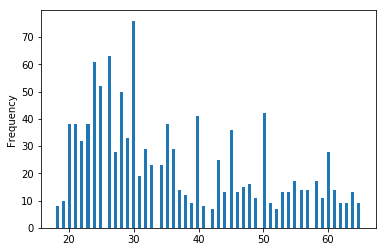

In [8]:
ccss.s3.plot.hist(bins=100);

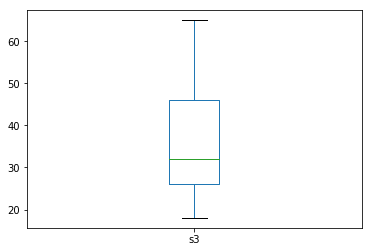

In [9]:
ccss.s3.plot.box();

### describe 
```Python
df.describe(
    percentiles=[0.05,0.01],
    include = 'None'/'all',
    exclude
           )    
```

In [10]:
ccss.describe()

,time,id,s3,a4,a8,a9,a10,a16,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,992.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,200778.085440,192.285092,36.358326,3.379250,3.250218,3.762860,3.326940,3.387969,7543.346774,117.088056,124.716652,122.798605,98.474281,140.932868,108.326068,95.893501,99.222697,94.059791
std,81.488785,258.900612,12.860567,2.479942,2.238250,2.202152,2.887416,1.917667,6987.619590,50.000647,44.816700,39.480886,50.820751,47.270174,34.296546,20.997097,28.433333,23.116453
min,200704.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200704.000000,73.000000,26.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3500.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.000000,85.917363,88.035919,84.749867
50%,200712.000000,151.000000,32.000000,3.000000,3.000000,3.000000,2.000000,3.000000,5500.000000,100.000000,100.000000,100.000000,100.000000,150.000000,100.000000,93.728032,88.035919,96.856991
75%,200812.000000,230.500000,46.000000,3.000000,3.000000,4.000000,3.000000,3.000000,9000.000000,150.000000,150.000000,150.000000,150.000000,200.000000,100.000000,109.349371,110.044898,108.964114
max,200912.000000,1570.000000,65.000000,9.000000,9.000000,9.000000,9.000000,9.000000,35000.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,156.213387,176.071837,145.285486


In [11]:
# describe by group
ccss.groupby('s0').s3.describe(percentiles=[0.05,0.1])

,count,mean,std,min,5%,10%,50%,max
s0,,,,,,,,
上海,387.0,37.759690,13.673530,18.0,21.0,23.0,33.0,65.0
北京,378.0,36.431217,13.129301,18.0,20.0,22.0,33.0,65.0
广州,382.0,34.866492,11.544072,18.0,21.0,23.0,32.0,65.0


### statsmodels
https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html
将数据指定为类，再调用类相对应的一些属性。**数据要求比较严格，不要混入字符串**。
```Python
class statsmodels.stats.weightstats.DescrStatsW(
    data:
    weights = None
    ddof = 0 
    )
```
Use DescrStatsW to calculate the following Statistics
```Python
nobs               # equal to sum of weights
sum
sum_weights        # weighted sum of data
mean
quantile(probs)    # Compute quantiles for a weighted sample
std
std_mean           # standard deviation of weighted mean
sumsquares         # weighted sum of squars of demaned data
var
```

In [12]:
des = ws.DescrStatsW(ccss.loc[:,['index1','index1a','index1b']])
des.nobs

1147.0

In [13]:
des.mean

array([95.89350142, 99.22269733, 94.05979116])

In [14]:
des.quantile([0.05,0.1,0.5,0.9,0.95])

,col1,col2,col3
p,,,
0.05,62.485355,44.017959,60.535619
0.10,70.296024,66.026939,72.642743
0.50,93.728032,88.035919,96.856991
0.90,117.160041,132.053878,121.071238
0.95,124.970710,132.053878,133.178362


In [15]:
des.var

array([440.49372109, 807.74958831, 533.90452841])

## Discrete Variable
### 单变量频数统计
```Python
series.value_counts(
    normalize = False,    # 是否返回构成比而不是原始频数
    sort = True,
    ascending = False,
    bins        # 进行分段
    dropna = True)
```

In [16]:
ccss.time.value_counts()

200812    304
200712    304
200704    300
200912    239
Name: time, dtype: int64

In [17]:
ccss.s3.value_counts(bins=10)

(22.7, 27.4]                  242
(27.4, 32.1]                  207
(17.951999999999998, 22.7]    126
(32.1, 36.8]                  113
(41.5, 46.2]                   94
(55.6, 60.3]                   84
(46.2, 50.9]                   84
(36.8, 41.5]                   84
(50.9, 55.6]                   59
(60.3, 65.0]                   54
Name: s3, dtype: int64

In [18]:
ccss.s5.value_counts(True)

公司普通职员（白领）       0.304272
企/事业管理人员         0.154316
退休               0.108980
个体经营者/私营业主       0.107236
无业/待业/失业/家庭主妇    0.075850
工人/体力工作者（蓝领）     0.070619
专业人士（如医生、律师等）    0.044464
其他职业             0.044464
教师               0.037489
国家公务员            0.028771
学生               0.023540
Name: s5, dtype: float64

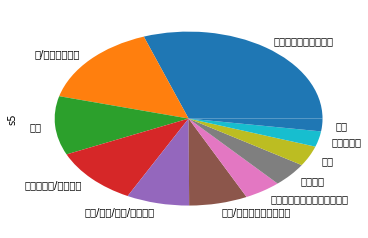

In [19]:
ccss.s5.value_counts().plot.pie();

### Cross Table
```Python
pd.crosstab(
行列设定
    index / columns : 行变量/列变量，多个时以list形式提供 
    rownames / colnames = None : 交叉表的行列名称
单元格设定
   values : 在单元格中需要汇总的变量列，需要进一步指定aggfunc, aggfunc : 相应的汇总函数
行列百分比计算
   normalize = False : {'all', 'index', 'columns'}, or {0,1} 'all' / True : 总计百分比
   'index' / 0 : 分行计算百分比
   'columns' / 1 : 分列计算百分比
汇总设定
    margins = True: 计算边际汇总的百分比
    margins = False : 不加入行列汇总
    margins_name = 'All' : 汇总行/列的名称 
dropna = True :
```

In [20]:
pd.crosstab(ccss.s2,ccss.s0)

s0,上海,北京,广州
s2,,,
女,166,190,154
男,221,188,228


In [21]:
pd.crosstab(ccss.s2,ccss.s0,normalize=0,margins=True)

s0,上海,北京,广州
s2,,,
女,0.325490,0.372549,0.301961
男,0.346939,0.295133,0.357928
All,0.337402,0.329555,0.333043


In [22]:
pd.crosstab([ccss.s2,ccss.O1],ccss.s0)

s0      上海   北京   广州
s2 O1               
女  有    31   51   34
   没有  135  138  119
男  有    56   67   73
   没有  165  120  155

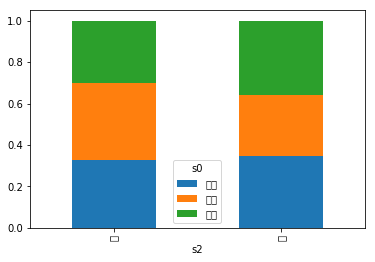

In [23]:
pd.crosstab(ccss.s2,ccss.s0,normalize=0).plot.bar(stacked=True);

# <font color='blue'>Central Limit Theorem(CLT)

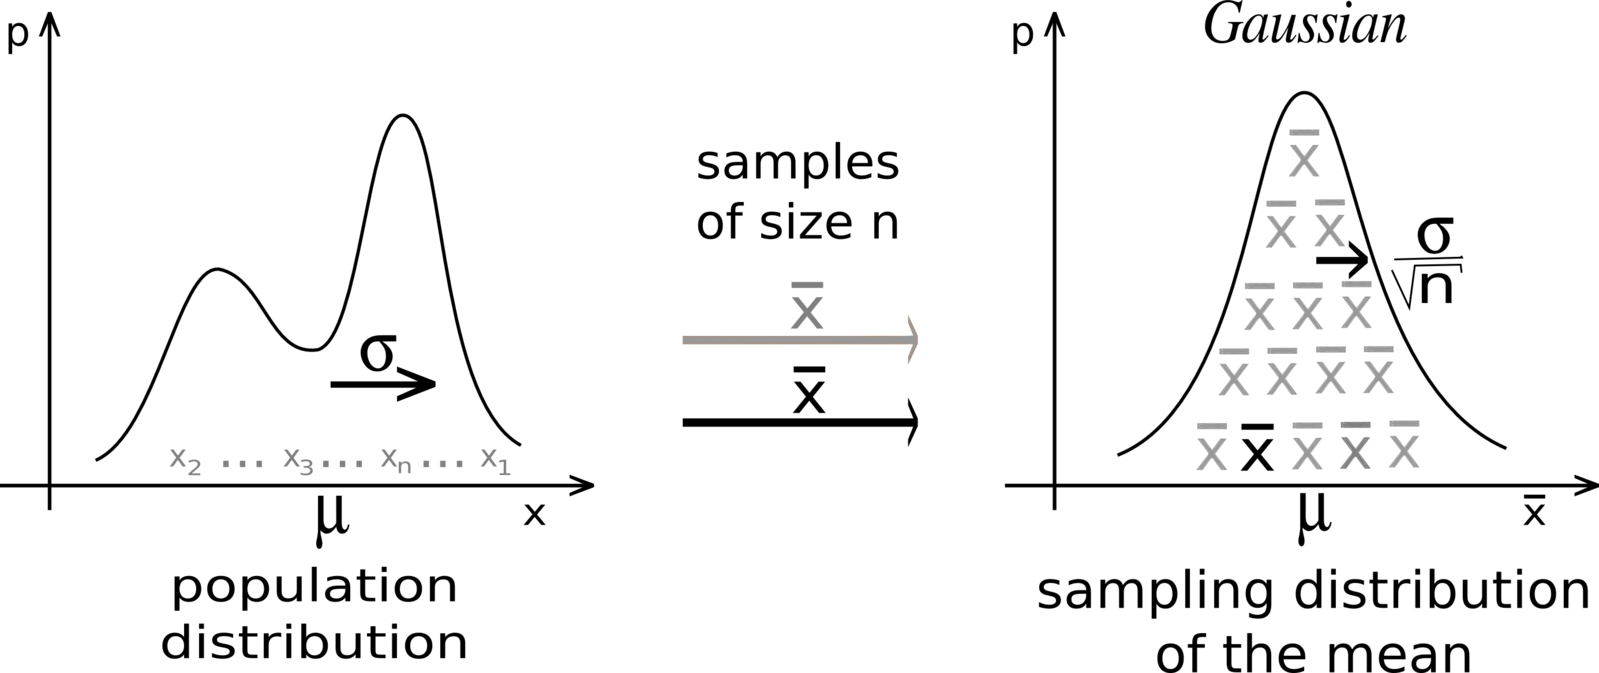

In [24]:
from IPython.display import Image
from IPython.display import display
im1 = Image("figs/CLT.png",width=800)
display(im1)

When independent random variables are added, their **properly normalized sum** tends toward a normal distribution, even if the original variables themselves are not normally distributed.

# <font color='blue'>t分布</font>
- 非正态分布的**抽样样本均值**服从正态分布
    - std.error: $\displaystyle \sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}$, $\sigma$ 总体标准差
    - 样本误差: $\displaystyle S_{\bar{X}}=\frac{s}{\sqrt{n}}$, s 样本标准差
    - The parent population does not need to be normally distributed, the distribution of the population of sample means ${\bar{X}}$ is assumed to be normal.$\displaystyle \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ 服从标准正态分布,
    - <font color='red'>$\displaystyle t = \frac{\bar{X}-\mu}{s/\sqrt{n}}$</font>, $t(\nu)$ with $\nu=n-1$服从t分布, 当$\nu\rightarrow\infty$,$t(\nu)$ 正态分布
    - 总体均值的**confidence interval (CI)**: 
        - two tailed tests: <font color='red'>$\displaystyle  \bar{X}-t_{\nu/2}s/\sqrt{n}<\mu<\bar{X}+t_{\nu/2}s/\sqrt{n}$ </font>
        - one tailed tests: 

# <font color='blue'>假设检验
- 小概率原理: 小概率事件在一次随机抽样中是不会发生的
- 统计方法适用条件
    - Independence: 个观测量间相互独立，不能相互影响 
    - Normality: 理论上要求样本取自正态总体
    - Homogeneity(方差齐性): 两检验所对应的总体方差相等

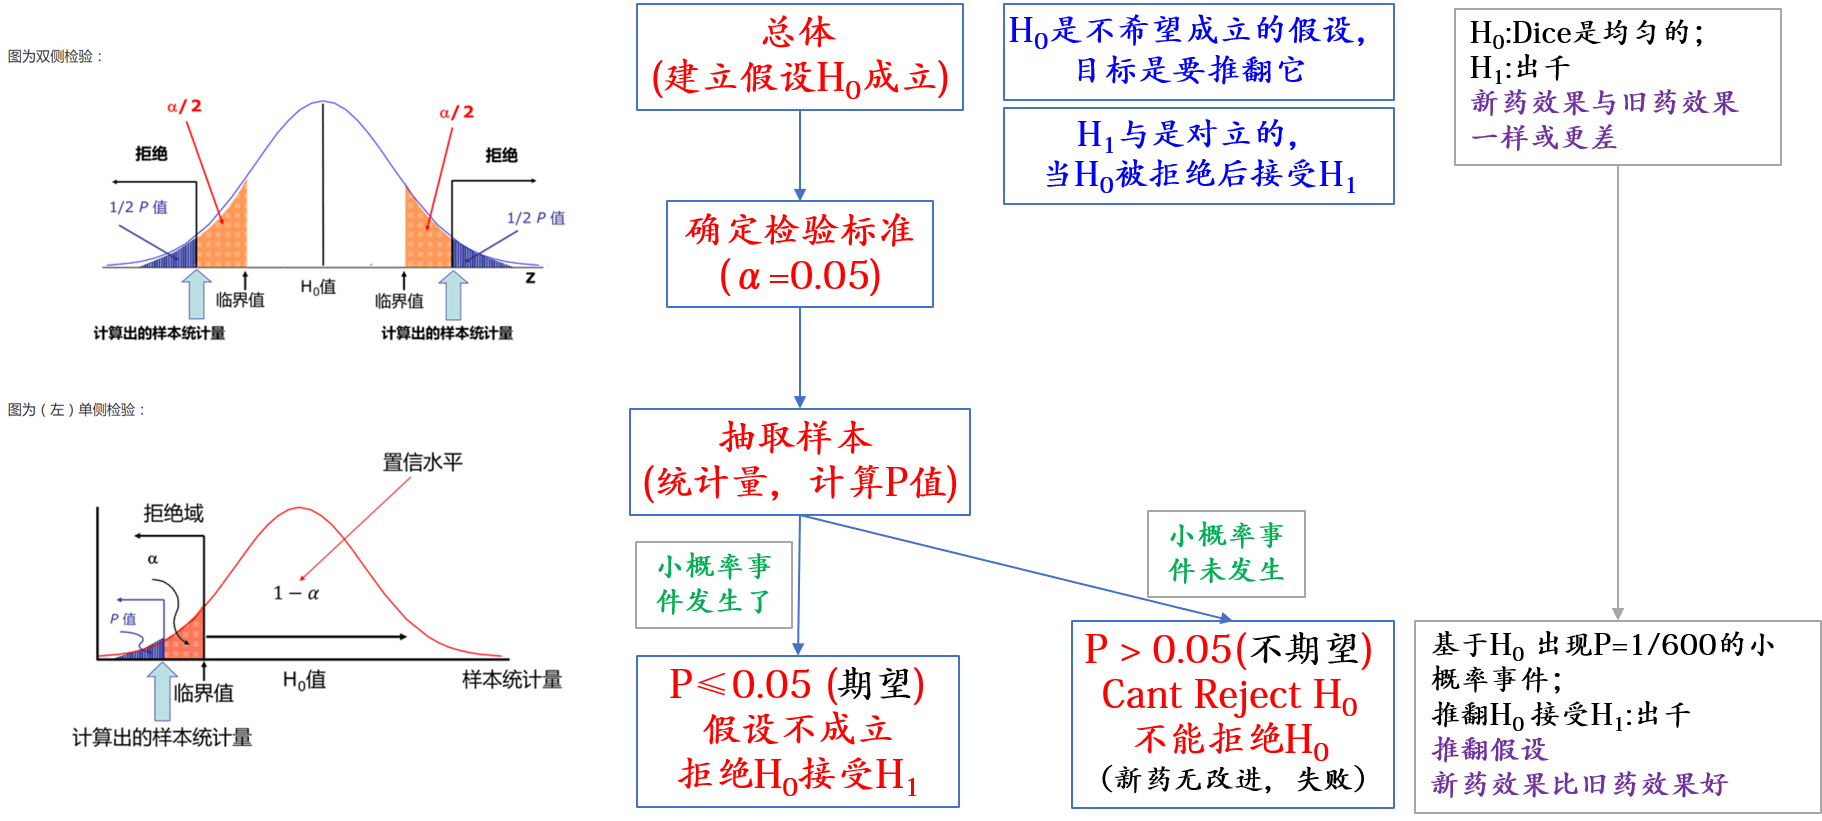

In [25]:
im3 = Image("figs/Hypysis.png",width=1000)
display(im3)

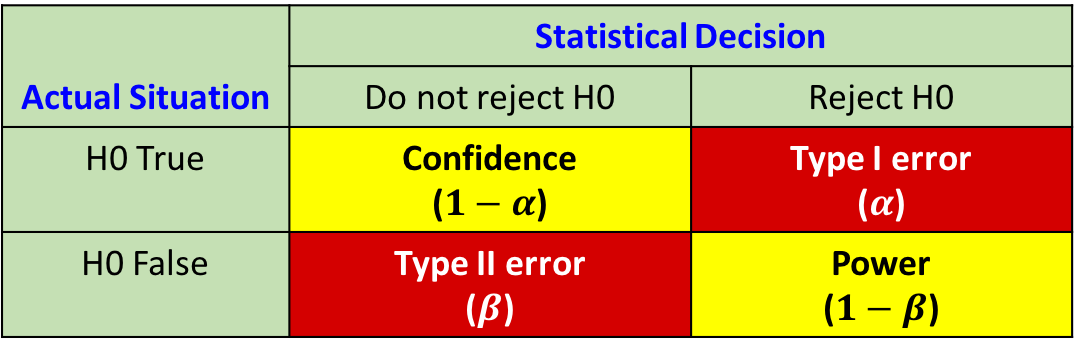

In [26]:
im4 = Image("figs/HypoMatrix.png",width=500)
display(im4)

- <font color='red'>**Level of significance $\alpha$**</font>: referred to as the level of significant of the statistical test. The type I error, which statistical tests permit us to control by our selection of $\alpha$.
- <font color='red'>**Confidence Coefficient $(1-\alpha)$**</font>: is the probability that the null hypothesis $H_0$ is not rejected when in fact it is true and should not be rejected.
- <font color='red'>**$\beta$ risk**</font>: is referres to as the consumer's risk level. Type II error is dependent on the difference between the hypothesized and actual values of the population parameter.
- <font color='red'>**Power of a Test $(1-\beta)$**</font>: is the probability of rejecting the null hypothesis $H_0$ when the fact it is false and should be rejected.

# 均值间的比较
## One-sample t-test
In testing the null hypothesis that the population mean is equal to a specified value $\mu$, one uses the statistic
<font color='red'>$\displaystyle t = \frac{\bar{X}-\mu}{s/\sqrt{n}}$</font>

where $\bar X$ is the sample mean, $s$ is the Standard deviation of the sample and $n$ is the sample size. The degrees of freedom used in this test are $n-1$. 

- 目的：<font color='red'>**推断样本是否来自某已知总体，即要检验样本所在总体的均值是否等于已知的总体均值**</font>
    - $H_0$: 样本均数与(假定的)总体均数的差异**完全是抽样误差造成的**
    - $H_1$: 样本均数与(假定的)总体均数的差异除抽样误差造成外，也反映了**两个总体均数确实存在差异**
- 原理：
In testing the null hypothesis that the population mean is equal to a specified value $\mu_0$, one uses the statistic
<font color='red'>$\displaystyle t = \frac{\bar{X}-\mu_0}{s/\sqrt{n}}$</font>
    + where $\bar X$ is the sample mean, $s$ is the Standard deviation of the sample and $n$ is the sample size. The degrees of freedom used in this test are $n-1$. 
    + Although the parent population does not need to be normally distributed, the distribution of the population of sample means $\bar X$ is assumed to be normal. By the central limit theorem, if the observations are independent and the second moment exists, then $t$ will be approximately normal $N(0;1)$.
    + The neumerator measures how far the observed sample mean $\bar{X}$ is from the hypothesized mean $\mu_0$.
    + The denominator is the standard error of the measure 
    + t represents how many standard errors $\bar{X}$ is from $\mu_0$
- <font color='red'>**P value**</font>:
    - The P value is the probability of obtaining a test statistic equal to or more extreme than the result obtained from the sample data, given that the null hypothesis $H_0$ is really true.
    - 最终求得的P值表示**从假设总体中抽出当前样本均数(及其极端情况)的概率的总和**
    - 如果$P\leq\alpha$,成为了我们定义的小概率事件，则我们怀疑所做的假定不成立，<font color='red'>**reject $H_0$**</font>.
    - 如果$P > \alpha$, 我们<font color='red'>**不能拒绝$H_0$**</font>，但也不表示接受$H_0$. 
- **适用条件**：根据中心极限定律，一般均数的抽样分布都不会有问题(样本量大于30)，真正会限制该方法的是**均数是否能够代表相应数据的集中趋势**
    - 强烈偏态分布时，均数已经无法正确代表数据的集中趋势
    - 只要数据分布不是强烈的偏态，一般而言单样本t检验都是适用的
### scipy
```Python
scipy.stats.ttest_1samp(
    a          # 类list格式的样本数据
    popmean    # H0所对应的总体均数
```

In [27]:
ccss.query("s0 == '广州' & time == 200704").index1.describe()

count    100.000000
mean      97.164727
std       20.808324
min       31.242677
25%       85.917363
50%      101.538702
75%      109.349371
max      140.592049
Name: index1, dtype: float64

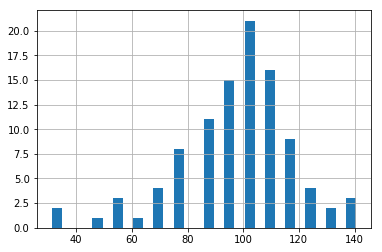

In [28]:
ccss.query("s0 == '广州' & time == 200704").index1.hist(bins=30);

In [29]:
ss.ttest_1samp(ccss.query("s0 == '广州' & time == 200704").index1,100)

Ttest_1sampResult(statistic=-1.3625667518512996, pvalue=0.17611075148299993)

样本的均值是97.2，与总体假定均值100差2.8，均值相差2.8及以上的在100次抽样中会出现17.6次。

### statsmodels
```Python
DescrStatsW.tconfint_mean(      # 计算均数的可信区间
    alpha = 0.05
    alternative = 'two-sided'） # 结果输出：可信区间的上下限                         
```
```Python
DescrStatsW.ttest_mean(         # 进行单样本t检验
    value = 0                   # H0所对应的总体均值
    alternative = 'two-sided'/'larger'/'smaller')    # 结果输出：t值，P值，自由度    
```

In [30]:
des1 = ws.DescrStatsW(ccss.query("s0 == '广州' & time == 200704").index1)
des1.mean

97.16472701710536

In [31]:
# 计算均数的95% 可信区间
des1.tconfint_mean()

(93.03590418536487, 101.29354984884586)

In [32]:
# 进行单样本t检验,双侧
des1.ttest_mean(100)

(-1.3625667518512996, 0.17611075148299993, 99.0)

In [33]:
# 进行单样本t检验,单侧
des1.ttest_mean(100,'smaller')

(-1.3625667518512996, 0.08805537574149996, 99.0)

In [34]:
# 进行单样本t检验,单侧
des1.ttest_mean(100,'larger')

(-1.3625667518512996, 0.9119446242585001, 99.0)

## Two-sample t-test
- 目的: <font color='red'>**推断两样本是否来自相同的总体/检验两样本所代表的总体均数是否相等**</font>, 如：AB方法谁更好？
    - $H_0: \mu_1 = \mu_2$
    - $H_1: \mu_1 \neq \mu_2$
    - $\alpha = 0.05$
- Given two groups (1, 2), this test is only applicable when:
    - the two sample sizes (that is, the number n of participants of each group) are equal;
    - it can be assumed that the <font color='red'>**two distributions have the same variance**</font>;
- <font color='red'>$\displaystyle t = \frac{\bar{X}_1-\bar{X}_2}{S_{\bar{X}_1-\bar{X}_2}}$</font>
- Denominator depends on **dependent/independent two-sample t-test, equal/unequal  sample sizes, equal/uneual variance**
- **适用条件**：
    - 独立性：对结果影响较大，但一般没问题
    - 正态性：分组考察其正态性，可用直方图查看
    - 方差齐性：对结论的影响较大，需要进行方差齐性检验 

### Scipy
#### 两样本t检验
```Python
scipy.stats.ttest_ind(                     # 进行两样本t检验
                    a,b                    # 类数组格式的两组数据
                    equal_var = True       # 两组方差是否齐同，方差不齐时给出 Welch‘s t检验的结果
                    nan_policy = propagate # 对缺失值的处理
                    propagate              # 如果有缺失值，返回Nan 
                    raise                  # 如果有缺失值，是否抛出错误
                    omit)                  # 如果有缺失值，忽略Nan
```
#### 方差齐性的检验方法：
```Python
scipy.stats.bartlett()                    # Bartlett's 方差齐性检验
scipy.stats.levene()                      # Levene 方差齐性检验，该结果针对非正态分布总体更稳健，相对更常用
```

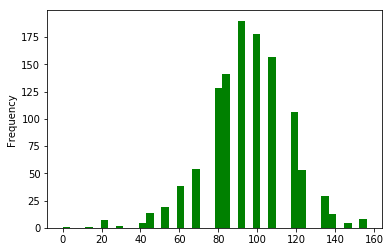

In [35]:
# 分布的对称性考察
ccss.index1.plot.hist(bins=40,color='g');

In [36]:
# 分组描述
ccss.groupby('s7').index1.describe()

,count,mean,std,min,25%,50%,75%,max
s7,,,,,,,,
已婚,790.0,95.033106,21.282487,0.000000,85.917363,93.728032,109.349371,156.213387
未婚,343.0,98.282359,19.959824,23.432008,85.917363,101.538702,109.349371,156.213387
离异/分居/丧偶,14.0,85.917363,24.316544,31.242677,72.248692,85.917363,101.538702,124.970710


In [37]:
# 方差齐性
ss.levene(ccss.index1[ccss.s7 == '已婚'], ccss.index1[ccss.s7=='未婚'])

LeveneResult(statistic=0.6178737960192996, pvalue=0.43200314605212653)

Explain：
- H0：各组的离散程度相同(各组所在的方差是一样大的)，
- pvalue=0.42>0.05,因此不拒绝H0
- 为了方便，接受H0. 即认为 **各组的离散程度相同**成立

In [38]:
# two-sample t-test
ss.ttest_ind(ccss.index1[ccss.s7 == '已婚'], ccss.index1[ccss.s7=='未婚'])

Ttest_indResult(statistic=-2.405261376009453, pvalue=0.016320721789339597)

Explain:
- H0: 两样本所在总体均值的是一样大的
- pvalue=0.016 < 0.05, 拒绝H0，接受H1
- H1: **两样本所在总体均值的是不一样大的**

In [39]:
# 如果方差齐性不满足，做矫正two-sample t-test
ss.ttest_ind(ccss.index1[ccss.s7 == '已婚'], ccss.index1[ccss.s7=='未婚']
             ,equal_var = False)

Ttest_indResult(statistic=-2.4669071564965845, pvalue=0.013870360692360313)

上面的检验显示，实际上这两组样本是方差齐性的，因此结论不变。

#### 根据汇总值做 two-sample t-test
使用describe命令计算均值、标准差，然后使用 ttest-ind_from_stats 命令实现 t-test
```Python
scipy.stats.ttest_ind_from_stats(
                mean1,sted1,nobs1,          # nobs: sample size
                mean2,sted2,nobs2,
                equal_var = True)
```

In [40]:
ss.ttest_ind_from_stats(95.033106,21.282487,790.0,
                        98.282359,19.959824,343.0)

Ttest_indResult(statistic=-2.4052618666155126, pvalue=0.0163206999915329)

### statsmodels
#### ttest_ind
statsmodels 可以实现t-test，但是**无法完成方差齐性检验**
```Python
class statsmodels.stats.weightstatsW.CompareMeans(d1,d2)      # Both d1,d2 should be DescrStatsW formats
```
```Python
CompareMeans.ttest_ind(
                alternative = 'two-sided'/'larger'/'smaller',
                usevar = 'pooled'/'unequal',               # pooled: 方差齐, 方差不齐时用 unequal
                value = 0)                                 # H0假设所对应的均数差值是否为0,2,...
```
output<font color='red'>**(t-value,p-value,degrees of freedom)**

In [41]:
d1 = ws.DescrStatsW(ccss.index1[ccss.s7 == '已婚'])
d2 = ws.DescrStatsW(ccss.index1[ccss.s7=='未婚'])

comp = ws.CompareMeans(d1,d2)
comp.ttest_ind()

(-2.405261376009453, 0.016320721789339597, 1131.0)

In [42]:
comp.ttest_ind(usevar = 'unequal')

(-2.4669071564965845, 0.013870360692360308, 690.0875759383671)

#### CompareMeans other methods
```Python
ttest_ind([alternative,usevar,value])          # 两样本t-test
ttost_ind(low,upp[,usevar])                    # 单侧t-test，两组样本均值差值是否为low，upp
tconfint_diff([alpha,alternative,usevar])      # 基于t-test的均数差值估计95%可信区间，

ztest_ind([alternative,usevar,value])          # 两样本z-test
ztost_ind(low,upp[,usevar])                    # 基于成组z-test的等效性检验
zconfint_diff([alpha,alternative,usevar])      # 基于z-test的均数差值可信区间
```
z-test 是理想情况下的检验，一般是不用的。

In [43]:
# 均值的差值是否等于0，是否等于3
comp.ttost_ind(0,3)                              

(0.9918396391053302,
 ((-2.405261376009453, 0.9918396391053302, 1131.0),
  (-4.6260135587988405, 2.0788791351661217e-06, 1131.0)))

In [44]:
comp.tconfint_diff()

(-5.899791658291509, -0.5987129330356811)

In [45]:
comp.ztest_ind()

(-2.405261376009453, 0.01616090241970387)

## 配对 t-test
### 基本原理
- 配对设计：
    - 对同一受试对象对理前后的比较，或同一对象在不同时间段测量结果的比较
        - 个体的**基本特征在各次测量中不变**，因此测量结果间存在关联
        - 结果**混杂了时间的影响，尽量少用**
    - 对受试对象按情况相近者配对(或自身进行配对: 左右手)，分别给予几种处理，以观察这些处理的效果有无差异
        - 按照相应因素配伍，不同个体的测量结果可能都受到这些因素都影响，因此他们之间也有关联
    - 配对数据不能用成组方法分析：
        - 配对数据的每对数据之间都有一定的关联，如果采用成组设计的分析方法就会遗失配对信息
        - 相应的统计分析方法一定要能够从分利用这些配对信息
- 解决方案：求出每对的差值，检验差值总体均数是否为0，就可知<font color='red'>**两种处理是否有差异**</font> 
- 基本思路：
    - H0:两总体均值<font color='red'>**无差异**</font>，<font color='red'>**差值序列**</font>均值$\mu_0=0$; 
    - H1:两总体均值<font color='red'>**有差异**</font>，<font color='red'>**差值序列**</font>均值$\mu_0\neq0$; 
    - 构造统计量：<font color='red'>**差值的单样本t-test**</font>
    - 计算每对测量值差值，检验差值序列的均值$\mu_0$是否与0有显著差异
        - $\mu_0$与0有显著差异： 两总体均值存在显著差异
        - $\mu_0$与0无显著差异： 两总体均值不存在显著差异
    
<font color='red'>$t=\frac{\bar{D}}{s/\sqrt{n}}$  

In [46]:
ccss_p = pd.read_excel('CCSS_sample/CCSS_sample.xlsx',sheet_name = 'CCSS_pair')
ccss_p.head()

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
0,200704,22,2,59,100,100,100,100,50,70.296024,66.026939,72.642743,50,100,100,100,100,70.296024,66.026939,72.642743
1,200704,40,2,28,150,150,150,150,100,109.349371,110.044898,108.964114,150,100,100,200,100,101.538702,110.044898,96.856991
2,200704,45,1,55,100,50,50,100,200,78.106694,132.053878,48.428495,150,100,150,150,100,101.538702,110.044898,96.856991
3,200704,69,1,26,150,200,150,50,100,101.538702,110.044898,96.856991,150,100,150,200,200,124.970710,154.062858,108.964114
4,200704,98,1,63,100,200,150,150,100,109.349371,88.035919,121.071238,150,150,100,0,100,78.106694,110.044898,60.535619


### Scipy
- 确认配对信息是否的确存在： 
```Python
# output(相关系数，Pvalue), H0: array1 & array2 没有联系，总体相关系数为0
ss.pearsonr(array1,array2)       
```
- 配对 t-test
```Python
scipy.stats.ttest_rel(
    a,b,            # array_like
    nan_policy = 'propagate'/'raise'/'omit')
# output(相关系数，Pvalue),H0: 总体均数的差值为0, 无差别
```

In [47]:
ccss_p.loc[:,['index1','index1n']].describe()

,index1,index1n
count,88.000000,88.000000
mean,98.787216,96.035730
std,16.152752,20.102950
min,70.296024,39.053347
25%,85.917363,85.917363
50%,101.538702,93.728032
75%,109.349371,109.349371
max,132.781379,132.781379


In [48]:
# 用相关分析确认 配对信息是否的确存在
ss.pearsonr(ccss_p.index1,ccss_p.index1n)

(0.2638011798615909, 0.013011623679510012)

Explain：
- 相关系数 >= 0.26 的概率是0.013，是小概率事件，推翻H0
- array1 & array2 是**有关联的**

In [49]:
ss.ttest_rel(ccss_p.index1,ccss_p.index1n)

Ttest_relResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

pvalue=0.25 > 0.05, 因此不能拒绝H0(一样)，不能认为有差别

In [50]:
# 直接求出差值并进行单样本t-test
ss.ttest_1samp(ccss_p.index1 - ccss_p.index1n,0)

Ttest_1sampResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

### statsmodels
- 两个界值点的单侧配对t-test 
```Python
statsmodels.stats.ttost.paired       
```
- 求出差值后用单侧t-test
```Python
DescrStatsW.ttest_mean()
```

In [51]:
des0 = ws.DescrStatsW(ccss_p.index1 - ccss_p.index1n)
des0.ttest_mean()

(1.1616334792419987, 0.2485614438619105, 87.0)

# 适用条件的考察
## 独立性考察
### 含义
- <font color='red'>**不同案例间的取值互相独立**</font>
    - 不受到除研究中考虑到的分组因素、配对因素等研究因素之外任何其他因素的影响
    - 其他非研究因素的影响基本可以等同于随机误差
- 非独立的情形：
    - 研究儿童生长发育，样本中不能存在兄弟、表兄弟等近亲关系
    - 流感等传染病等的发病与否
- 数据非独立的影响较大，传统统计模型均按照数据独立假设进行推导，非独立会导致**数据方差估计不准确**，进而导致假设检验结果错误
    - 很严重的数据非独立也会使得参数估计值出现偏差
- 尽量保证数据不违反独立性 及 保证随机化真正得到实施
- 对策
    - 采用专门的方差分析模型，或者专门对方差等进行校正
    - GEEs、混合效应模型等专门的非独立数据分析模型

## 正态性考察
## 正态性考察
### 含义
- 普通方法：
    - 如t-test，但因素方差分析等，事实上对正态性略微偏离都有比较好的耐受性，结果任然是稳健的
    - 偏离程度过大时仍然需要处理，且此时均数的代表性也会有问题
- 简单统计模型：
    - 需要进行模型残差考察，光靠原始变量的分布并不能得到最终结论
    - 典型错误：多重线性回归，直接看Y的分布，而不去做残差分析
- 复杂统计模型：
    - 为避免结果收到干扰，原始变量都需要先做标准正态变换后再建模
- 用图形方法检验正态性：
    - hist图 或 bar图
    - P-P 图： 比较理论与实际的累积概率分布
    - Q-Q 图： 比较变量的理论百分位数与实际百分位数
- 假设检验方法考察正态性：
    - <font color='red'>**Kolmogorov-Smirnov 检验**</font>：
        - 考察H0理论分布（可以是任何分布）下累计先对频数和实际频数间的差异
        - 取频数差值绝对值的最大值为统计量
        - 结论比较严格，即使只有个别案例有偏离也会拒绝H0
        - <font color='blue'>**scipy.stats.kstest(a_vector_like_data,'norm')**
        - <font color='blue'>**scipy.stats.anderson(a_vector_like_data,dist='norm')**
    - <font color='red'>**Shapiro-Wilk 检验**</font>：
        - 基于数据的偏度系数和峰度系数进行正态偏离程度的检验
        - 相对KS检验而言结果更稳妥些
        - <font color='blue'>**scipy.stats.shapiro(a_vector_like_data)**
        - <font color='blue'>**scipy.stats.normaltest(a_vector_like_data)**
    - <font color='red'>**残差分析**</font>：
        - 建模完毕后将残差存储为新变量，就可以进行图形观察甚至正态性检验
- 数据非正态时的应对策略：
    - 评估严重程度
    - 变量变换：
        - 正偏态分布：**对数变换或平方根变换**，若有负值，加常数后再变换
        - 超过30%～60% 区间率：**平方根反正弦变换**
    - 慎用过于复杂的变量变换方式：如Box-cox变换
    - 更换分析方法：
        - 非参数方法：秩和检验、秩变换分析
        - 专用的分析方法：校正的t-test、校正的方差分析
        - 特殊的计算统计学方法：Bootstrap 技术、贝叶斯推断方法       

### 图形方法考察正态性
- hist or box

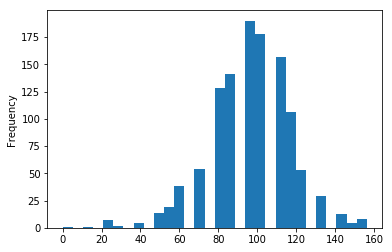

In [52]:
ccss.index1.plot.hist(bins=30);

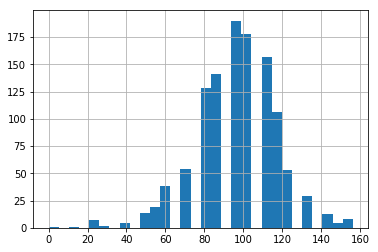

In [53]:
ccss.index1.hist(bins=30);

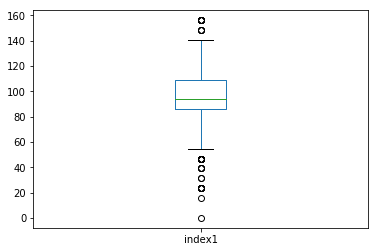

In [54]:
ccss.index1.plot.box();

### 假设检验考察正态性
- <font color='red'> **H0: 数据服从正态分布**
- K-S test：
```Python
scipy.stats.kstest(a_vector_like_data,'norm')
```
- Shapiro test：
```Python
scipy.stats.shapiro(a_vector_like_data)
```
- D'Agostino and Pearson's test: 基于峰度和偏度系数进行正态性检验
```Python
scipy.stats.normaltest(a_vector_like_data)
```
- Anderson-Darling test: 是KS test的改进
```Python
scipy.stats.anderson(a_vector_like_data,dist='norm')
```

In [55]:
ss.kstest(ccss.index1,'norm')

KstestResult(statistic=0.999128160418483, pvalue=0.0)

Explain:
- pvalue < 0.05, 拒绝H0 --> 数据不服从正态分布   

In [56]:
# 分组进行检验
ks = lambda x: ss.kstest(x,'norm')
ccss.groupby('time').index1.apply(ks)

time
200704                   (1.0, 0.0)
200712    (0.9967105263157895, 0.0)
200812                   (1.0, 0.0)
200912                   (1.0, 0.0)
Name: index1, dtype: object

In [57]:
# 用无参数的分组检验
ccss.groupby('time').index1.apply(ss.shapiro)

time
200704    (0.966885507106781, 2.2581652956432663e-06)
200712    (0.9562033414840698, 6.699920618302713e-08)
200812    (0.9770516753196716, 8.659828745294362e-05)
200912    (0.9523671865463257, 4.465105973849859e-07)
Name: index1, dtype: object

## 方法齐性考察
### 含义
- 重要性：
    - 在各组间样本含量相差不太大时，方差轻微不齐仅会对方差分析结论有少许影响。一般而言，只要最大/最小方差之比小于3，分析结果都是稳定的。
    - 如果各组间样本含量相差过大时，方差不齐会对方差分析造成相当大的影响。主要是基于H0假设下的标准误估计会严重失真
    - 因此，统计软件往往会直接提供选项进行方差齐性检验的计算，甚至于进一步提供校正后的分析结果
- 用假设检验方法考察方差齐性：
    - <font color='red'>**Bartlett's 方差齐性检验**</font>：
        - 基于数据服从正态分布的假设，对其方差齐同性进行检验
        - 数据略微偏离正态分布时，检验结果就会出现较大偏差
    - <font color='red'>**Levene 方差齐性检验**</font>：
        - 可用于正态或者非正态分布的资料（平均水平可以使用均数或者中位数等）
        - 在数据可能非正态的情况下，精度比Bartlett检验号
        - 可作为标准的方差齐性检验方法
    - <font color='red'>**Fligner-Killeen 检验**</font>:
        - 一种非参数的方差齐性检验方法，不依赖于具体分布
- 方差不齐的应对策略
    - 对原检验方法做校正
        - 校正的t-test
        - 校正的方差分析
        - 校正的事后两两比较
    - 方差严重不齐时，最好考虑变量变换，或者改用非参数方法
    
### 图形方法考察正态性
- hist or box

time
200704    AxesSubplot(0.125,0.125;0.775x0.755)
200712    AxesSubplot(0.125,0.125;0.775x0.755)
200812    AxesSubplot(0.125,0.125;0.775x0.755)
200912    AxesSubplot(0.125,0.125;0.775x0.755)
Name: index1, dtype: object

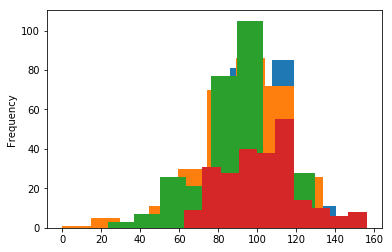

In [58]:
ccss.groupby('time').index1.plot.hist()

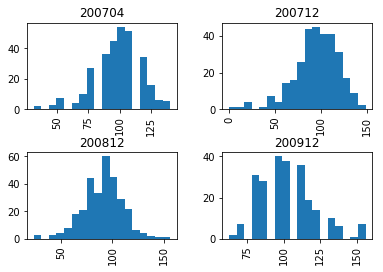

In [59]:
ccss.index1.hist(by = ccss.time,bins=18);

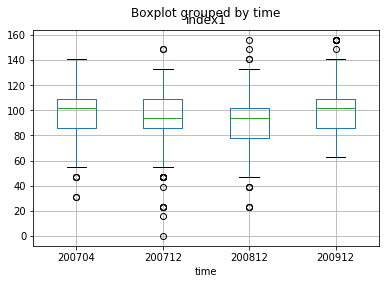

In [60]:
ccss.boxplot(column='index1',by='time');

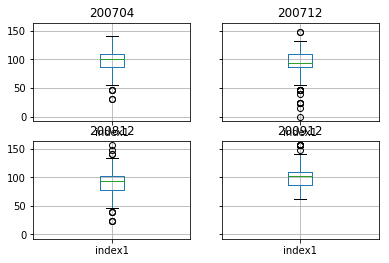

In [61]:
ccss.groupby('time').boxplot(column='index1');

### 假设检验考察方差齐性
- <font color='blue'>**H0: 检验组的离散度一样**</font>
- <font color='red'>**Bartlett's 方差齐性检验**</font>，对数据有正态性要求
```Python
scipy.stats.bartlett(a,b)
```
- <font color='red'>**Levene 检验**</font>，在数据非正态分布时精度比Bartlett检验好，可调中间值的度量，默认median
```Python
scipy.stats.levene(a,b,center = {'mean','median','trimmed'})
```
- <font color='red'>**Fligner-Killeen 检验**</font>，非参数检验，不依赖分布
```Python
scipy.stats.fligner(a,b,center = {'mean','median','trimmed'})
```

In [62]:
ss.bartlett(ccss.index1[ccss.time == 200704],
            ccss.index1[ccss.time == 200712],
            ccss.index1[ccss.time == 200812],
            ccss.index1[ccss.time == 200912])

BartlettResult(statistic=11.12381848334319, pvalue=0.011074841431979916)

pvalue=0.01 < 0.05, 拒绝H0 ---> 离散度是不一样的（variance are difference）

In [63]:
ss.levene(ccss.index1[ccss.time == 200704],
            ccss.index1[ccss.time == 200712],
            ccss.index1[ccss.time == 200812],
            ccss.index1[ccss.time == 200912])

LeveneResult(statistic=2.2068913639343792, pvalue=0.08563270755698366)

pvalue=0.09 > 0.05, 不能拒绝H0 ---> 离散度可能一样

# <font color='blue'> 单因素方差分析
## 基本原理    
- 目的：
    - <font color='red'>**多组的均数的比较**</font>
    - 检验某一个控制因素（分类变量）的差异是否会给观测变量（连续变量）带来显著影响
- 实例：
    - 不同肥料对某农作物亩产量是否有显著差异
    - 不同的推销策略是否对推销额产生显著影响
- 用两两检验的方式进行多组间的比较会增大犯第一类错误的概率，一般不这么做
- 基本原理：
    - 方差分析是基于**变异分解的原理**来进行的
        - 总变异 = 随机变异 + 处理因素导致的变异 
        - <font color='blue'>**处理因素导致的变异**</font>就是要研究的对象，我们希望证明它是否大于0
        - 组内变异：反映个体差异（随机变异）的大小
        - 组间变异：反映个体差异（随机效应）的影响与可能存在的处理因素的影响之和
        - <font color='red'>**总变异 = 组内变异（随机变异） + 组间变异（随机变异 + 处理因素导致的变异）**</font>
    - 采用合适的指标表示组内变异和组间变异的大小，将两者比较，便可得知组内变异中是否真正包含了处理因素所导致的影响 
    - 统计量的含义 
    <font color='blue'>$\displaystyle F = \frac{SSA/(k-1)}{SSE/(n-k)} = \frac{MSA}{MSE}$</font>
        - F >> 1:组间变异远大于组内变异，处理因素有影响。F 多大？ 采用P值来确定
        - F = 1: 认为处理因素实际上无影响
        - F < 1: 可能出现，但没有实际意义
    - 适用条件：
        - 独立性：个样本必须是相互独立的随机样本
        - 正态性：样本都来自正态分布的总体
        - 方差齐性：样本来自的总体方差相等

## scipy
<font color='blue'>**H0: 检验组的总体均数是一样的**</font>
```Python
ss.f_oneway(a,b,c,d)        
```

In [64]:
ccss.query("s0 == '北京'").groupby('time').index1.describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
200704,100.0,100.054675,17.223412,54.674686,85.917363,101.538702,109.349371,140.592049
200712,101.0,97.130700,19.398654,46.864016,85.917363,93.728032,109.349371,148.402718
200812,102.0,91.966803,19.504446,39.053347,78.106694,93.728032,101.538702,148.402718
200912,75.0,102.580124,16.954212,70.296024,89.822698,101.538702,109.349371,148.402718


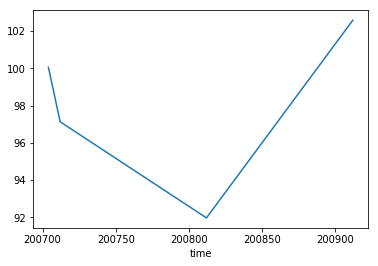

In [65]:
ccss.query("s0 == '北京'").groupby('time').index1.mean().plot();

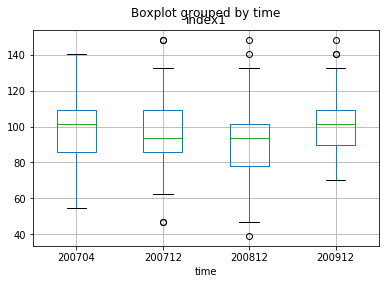

In [66]:
ccss[ccss.s0 == '北京'].boxplot('index1','time');

In [67]:
a = ccss.query("s0 == '北京'& time == '200704'").index1
b = ccss.query("s0 == '北京'& time == '200712'").index1
c = ccss.query("s0 == '北京'& time == '200812'").index1
d = ccss.query("s0 == '北京'& time == '200912'").index1
ss.levene(a,b,c,d) # default median

LeveneResult(statistic=0.44332330387152036, pvalue=0.7221678627997157)

pvalue=0.72 > 0.05 --> 可能是H0，可能是方差齐的

In [68]:
ss.f_oneway(a,b,c,d)

F_onewayResult(statistic=5.630155391280303, pvalue=0.0008777240313291846)

pvalue=0.001 < 0.05 ---> 拒绝H0：检验组的总体均数是不一样的

## statsmodels
- <font color='blue'>**H0: 检验组的总体均数是一样的**</font>
- 原理上是进行了一般线性模型的拟合，因此需要先进行模型设定
```Python
import statsmodels.api as sm
from statsmodels.formula.api import ols        # ols 最小二乘法
model = ols('y ~ x',data).fit()                # y:观测变量，x:分类变量
restable = sm.stats.anova_lm(model,typ=3)      # III型方差分解
restable      
```

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols        # ols 最小二乘法

ccss.time = ccss.time.astype('str')     # judge to category or str format

model = ols('index1 ~ time',data = ccss.loc[ccss.s0 == '北京',:]).fit()
restable = sm.stats.anova_lm(model,typ=3)      # III型方差分解
restable

,sum_sq,df,F,PR(>F)
Intercept,1.001094e+06,1.0,2955.259790,1.227203e-179
time,5.721643e+03,3.0,5.630155,8.777240e-04
Residual,1.266924e+05,374.0,NaN,NaN


## 均数间的多重比较
### 两两比较所必须解决的问题
- 多组比较时，无论是方差分析还是卡方检验，在拒绝H0之后，所接受的H1都是各种情况的组合
    - 各组间两两均有差异
    - 各组间只有两组有差异
    - 各组间有若干组有差异
- 为此，研究者还需要进一步回答各组间究竟是哪些和哪些存在差异，这样问题又回到了两两比较上
    - 最直接和原始的思路就是对**总的一类错误大小进行校正**
    - 关键：如何控制好总的一类错误大小

### 两两比较中会遇到的一类错误
- **CER**：比较误差，即每做一次比较犯一类错误的概率
- **EERC**：在完全无效假设（H0）下的实验误差率，即在H0成立时做完全比较所犯一类错误的概率
    - 事实上，很少会遇到H0完全成立的情形
    - 方差分析/卡方检验本身控制的就是EERC
- **MEER**：最大试验误差率，即在任何完全或部分无效假设下，做完全部比较所犯一类错误的最大概率值
    - MEER的适用范围显然更广

### 直接校正P值：
#### <font color='blue'>Sidak校正</font>
- 当无效假设（H0）实际上成立，各组均数无差别时，完全两两比较犯第一类错误的概率为$1-0.95^{k(k-1)/2}$,此即**EERC**
- 因此，进行一类错误控制时最直接的想法就是将总的$\alpha$水准控制在0.05，从而由上述公司反推得出每一个检验所使用的$\alpha_{ij}$
- 注意：如果统计软件直接进行校正操作，则往往会倒过来将每次检验的P值放大（最大放大为1），而固定每次$\alpha$比较的水准以便阅读
- <font color='blue'>Sidak校正只是在无效假设成立的情况下才适用的校正方法</font>。多数实际问题中，都是有些组的均数相同，而有些组的均数不同，因此控制MEER更为合适

#### <font color='blue'>Bonferroni 校正</font>
- Bonfeeroni不等式被广泛的用于H0部分成立的情况下，它通过控制CER，使得MEER被控制在所设定的水准以内，<font color='red'>$\displaystyle CER=\frac{\alpha}{c}$</font>, c 是比较次数
- 只要CER，即每次比较使用的$\alpha_{ij}$小于$\frac{\alpha}{c}$，就可以保证MEER不会大于$\alpha$

#### 直接校正法的缺陷
- 将两两比较分别进行，不仅使用麻烦，也增加了误差的影响
- **对一类错误的控制太严，结果往往偏于保守**。但是当研究者希望得到的阳性结论真实可信时，直接校正法过于严格的缺陷可以保证假阳性出现的概率。

### 联合检验
#### 联合检验法
- LSD t-test
    - 最小显著差异：Least Significant Difference
    <font color='red'>$\displaystyle LSD-t = \frac{\bar{x}_i-\bar{x}_j}{S_{\bar{x}_i-\bar{x}_j}}$</font>
    - LSD t-test 是t-test的一个变形，在标准误和自由度的计算上利用了全部样本信息，使得结果更为准确. (t-test标准误和自由度的计算只利用了相应两组的信息)
    - 如果不对检验水准做任何校正，则可以认为LSD法是最灵敏，或者说最容易得出阳性结论的
- S-N-K
    - 将总体样本分为多个同质子集
    - 组数很多时假阳性较高
- Tukey
- Duncan
- Scheffe
    - 进行多组的联合检验而不是两两检验
- Dunnett
    - 需要提供参照组，可进行单侧检验

#### 两两比较法的选择
- 如两个均数间的比较是独立的，或者虽有多个样本均数，但事先已计划好要做某几对均数的比较：用一般t-test
- 总体检验如果没有拒绝H0，不考虑两两比较
- 如果存在明确的对照组，要进行的是验证性研究，即计划好的某两个或几个组间（都和对照组）的比较：用Bonferroni（LSD）
- 若需要进行的是多个均数间的两两比较（探索性研究），此时希望得到的阳性结论尽可能是真实的，因此要严格控制一类错误
    - 各组人数相等：用Tukey
    - 比较较为复杂时：Scheffe较为稳妥，但相对比较保守
- 方差不齐时的两两比较：
    - 一般认为Games-Howell法较好
    - 但最好直接使用**非参数检验方法**
- 注意：对于事先无严格设计的多重比较，各组间的差别只是一种提示，要确认这种差别最好重新设计实验

### statsmodels
```Python
from statsmodels.sandbox.stats import multicomp as mc
```

```Python
statsodels.sandbox.stats.multicomp.multipletests(
    pvals              # 原始P值
    alpha = 0.05       # 希望控制的总alpha水准
    method = 'hs'      # 校正方法
            'bonferroni' 
            'sidak'
            'holm-sidak'         # step-down method using sidak adjustments
            'holm'               # step-down method using Bonferroni adjustments
            'simes-hochberg'     # step-up method (independent)
            'hommel'             # closed method based on Simes tests (non-negative)
            'fdr_bh'             # Benjamini/Hochberg (non-negative)
            'fdr_by'             # Benjamini/Hochberg (negative)
            'fdr_tsbh'           # two stage fdr correction (non-negative)
            'fdr_tsbky'          # two stage fdr correction (non-negative)
    is_sorted = 'False')         # output: 检验结果，Pvalue，alphacSidak,alphacBonf
```

In [70]:
from statsmodels.sandbox.stats import multicomp as mc

In [71]:
# [0.1,0.2,0.3] 是原始P值，b是Bonferroni，alpha/比较次数，此处为3
mc.multipletests([0.1,0.2,0.3],method = 'b')        

(array([False, False, False]),
 array([0.3, 0.6, 0.9]),
 0.016952427508441503,
 0.016666666666666666)

Explain:
- 校正以后的检验结果
- [0.1*3,0.2*3,0.3*3] 每次检验的P值放大（最大放大为1），而固定每次 alpha 比较的水准
- alphacSidak 校正后的新的 alpha = 0.01695
- alphacBonf = 0.0167, 0.05/3

### scikit_posthocs 
```Python
pip install scikit_posthocs
import scikit_posthocs as sp
```
```Python
scikit_posthocs.posthoc_conover(
            data
            val_col =
            group_col =
            p_adjust = 
                'bonferroni'
                'sidak'
                'holm-sidak'
                'holm'
                'simes-hochberg'
                'hommel'
                'fdr_bh'
                'fdr_by'
                'fdr_tsbh'
                'fdr_tsbky'
)
```
```Python
pc = sp.posthoc_conover(ccss,val_col='index1',group_col='time',p_adjust='bonferroni')
cmap = ['1','#fb6a4a','#08306b','#4292c6','#c6dbef']
heatmap_args = {'cmap':cmap, 'linewidths':0.25,'linecolor':'0.5',
                'clip_on':False,'square':True,'cbar_ax_bbox':[0.80,0.35,0.04,0.3]}
sp.sign_plot(pc,**heatmap_args);
```

In [72]:
pc = sp.posthoc_conover(ccss,val_col='index1',group_col='time',p_adjust='bonferroni')
pc

,200704,200712,200812,200912
200704,-1.000000,0.144102,2.043272e-06,1.000000e+00
200712,0.144102,-1.000000,2.434703e-02,1.211434e-02
200812,0.000002,0.024347,-1.000000e+00,5.260855e-08
200912,1.000000,0.012114,5.260855e-08,-1.000000e+00


value < 0.05, indicate they are difference

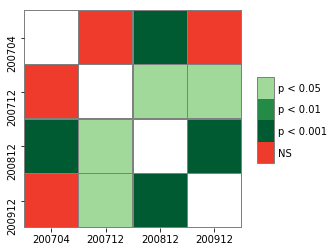

In [73]:
# use heatmap to show this difference
heatmap_args = {'linewidths':0.25,'linecolor':'0.5','clip_on':False,
               'square':True,'cbar_ax_bbox':[0.80,0.35,0.04,0.3]}
sp.sign_plot(pc,**heatmap_args);

green: p < 0.05, 是不一样的；
red: p > 0.05, 可能是一样的

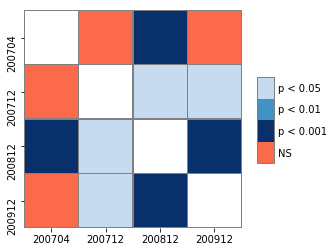

In [74]:
cmap = ['1','#fb6a4a','#08306b','#4292c6','#c6dbef']
heatmap_args = {'cmap':cmap, 'linewidths':0.25,'linecolor':'0.5',
                'clip_on':False,'square':True,'cbar_ax_bbox':[0.80,0.35,0.04,0.3]}
sp.sign_plot(pc,**heatmap_args);

# <font color='blue'>非参数检验方法</font>
## 为什么需要非参数分析方法
### 参数统计方法的局限
- 需要事先明确假定总体的分布
    - t-test
    - 方差分析
- 总体<font color='red'>**分布未知，或分布不符合要求**</font>时无法使用
- 结果为<font color='red'>**有序分类变量**</font>时无法使用
- 样本数据两端有不确定值时无法使用

### 非参数分析方法的特点
- 不依赖总体分布的具体形式
- 不是对分布参数进行估计或假设检验
    - 而是对<font color='red'>总体的分布位置/形状进行估计或假设检验</font>
- 适用范围广，几乎可用于任何情况
- 当资料符合参数检验方法的使用条件时，使用非参数方法的检验效能较低
    - 效能较高的秩和检验和检验效能可达到参数方法的90%～95%

### 分布类型/形状的检验方法
- 亦称为优度检验方法
- 检验样本所在总体是否服从已知的理论分布
    - 多项分类变量分布的卡方检验
    - 二项分类变量分布的二项分布检验
    - 考察连续变量是否服从各种常用分布的单样本K-S检验
- 检验样本序列随机性的Runs过程

### 分布位置检验方法
- 检验样本所在总体的分布位置（集中趋势）是否相同
- 平时说的非参数检验方法实际上指的就是这一类方法
- 两独立样本/多独立样本中心位置的检验
    - 秩和检验
    - 中位数检验
    - 两样本K-S检验
- 两相关样本/多个相关样本中心位置的检验
    - 配对秩和检验
    - 配伍Friedman双向秩方差分析
    
## 非参数分析方法的基本原理
- 首先应该明确该数据确实无法使用效率更高的参数方法
- 可以考虑使用的信息量
    - 中位数：大于/小于基于H0的中位数的样本个数分布是否均匀
    - 次序关系：数值和中位数的距离可以提供进一步的信息
- <font color='red'>**顺序统计量**</font>：非参数检验的理论基础
    - 通过对数据从小到大（即排队）并用排序号（排队号）代替原始数据进行统计分析
    - 秩（Rank）：排序号在统计学上称为秩（秩次）
    - 结（ties）：绝对值相等称为结，又称同秩，一般取平均秩次

## 独立样本比较的非参数方法
- Wilcoxon两样本秩和检验
    - **H0:两总体所在的中心位置相同**
        - 中位数可以代表中心位置，但只使用中位数的话信息量太小
    - 基于H0假定，混合编秩，分组求秩和
    - 考察各组秩和的大小是否明显偏离H0
    - 在非参数检验方法中是检验效能最高的
- Mann-Whitney U
    - 基本等价于两样本秩和检验
    - 可近似理解为基于秩次进行了两样本t检验
- Kolmogorov-Smirnov Z
    - 两样本K-S检验，检验效能不高
    - 考察的是**整体分布是否相同**，而不是只针对中心位置
- Kruskal-Wallis H检验
    - 本质上就是**基于秩次的单因素方差分析**，可用于两组或多组
- 多组比较多事后两两比较
    - 本质上仍然需要考虑如何控制总多一类错误
    - 样本量较小时，也有统计学家倾向于不做检验水准的校正  


## 独立样本比较的非参数方法
### 两样本比较
```Python
scipy.stats.median_test()           # 中位数检验，两组或多组均可以使用
scipy.stats.ranksums(a,b)           # wilcox秩和检验，相对使用较少
scipy.stats.mannwhitneyu(a,b,use_continuity,alternative) # Mann-Whitney U检验，实际使用中一般直接代替Wilcox秩和检验
scipy.stats.ks_2samp(data1,data2)        # 两样本KS检验
```

In [75]:
# Mann-Whitney U test
print(ss.mannwhitneyu(ccss.Qa3[ccss.s7=='未婚'],ccss.Qa3[ccss.s7=='已婚']))
print(ss.mannwhitneyu(ccss.Qa4[ccss.s7=='未婚'],ccss.Qa4[ccss.s7=='已婚']))
print(ss.mannwhitneyu(ccss.Qa8[ccss.s7=='未婚'],ccss.Qa8[ccss.s7=='已婚']))
print(ss.mannwhitneyu(ccss.Qa10[ccss.s7=='未婚'],ccss.Qa10[ccss.s7=='已婚']))
print(ss.mannwhitneyu(ccss.Qa16[ccss.s7=='未婚'],ccss.Qa16[ccss.s7=='已婚']))

MannwhitneyuResult(statistic=121516.5, pvalue=0.0016970638386570689)
MannwhitneyuResult(statistic=129092.5, pvalue=0.0860185071626205)
MannwhitneyuResult(statistic=124949.0, pvalue=0.011997137124192182)
MannwhitneyuResult(statistic=130219.0, pvalue=0.13680374106777782)
MannwhitneyuResult(statistic=128409.0, pvalue=0.04504623277222157)


pvalue < 0.05, 有区别

In [76]:
ss.ranksums(ccss.Qa3[ccss.s7=='未婚'],ccss.Qa3[ccss.s7=='已婚'])

RanksumsResult(statistic=2.7604079036339764, pvalue=0.005772923211835386)

Results of Mann-Whitney U test siminary as Ranksum test. 一般使用Mann-Whitney U test，它的适用范围更广，速度更快

In [77]:
ss.median_test(ccss.Qa3[ccss.s7=='未婚'],ccss.Qa3[ccss.s7=='已婚'])

(2.6726310409335143, 0.10208713262673606, 100.0, array([[158, 321],
        [185, 469]]))

pvalue=0.1,远大于U-test and ranksums-test，median_test的检验效能太低，一般不用

In [78]:
ss.ks_2samp(ccss.Qa3[ccss.s7=='未婚'],ccss.Qa3[ccss.s7=='已婚'])

Ks_2sampResult(statistic=0.07164630770934052, pvalue=0.1647598251581164)

pvalue 也很大，ks检验的是两样本组的总体的分布是否相同。他不是检验中心位置。

### 多样本比较
```Python
scipy.stats.kruskal(sample1,sample2,....,nan_policy='propagate')   # propagate,raise,omit
```

In [79]:
ss.kruskal(ccss.query("s0=='北京' & time == '200704'").Qa3,
           ccss.query("s0=='北京' & time == '200712'").Qa3,
           ccss.query("s0=='北京' & time == '200812'").Qa3,
           ccss.query("s0=='北京' & time == '200912'").Qa3)

KruskalResult(statistic=11.773756778518651, pvalue=0.008199757256201149)

Pvalue < 0.05, 样本之间是有区别的,因此需要对Qa3做两两比较

In [80]:
print(ss.mannwhitneyu(ccss.query("s0=='北京' & time == '200704'").Qa3,
                      ccss.query("s0=='北京' & time == '200712'").Qa3))
print(ss.mannwhitneyu(ccss.query("s0=='北京' & time == '200704'").Qa3,
                      ccss.query("s0=='北京' & time == '200812'").Qa3))
print(ss.mannwhitneyu(ccss.query("s0=='北京' & time == '200704'").Qa3,
                      ccss.query("s0=='北京' & time == '200912'").Qa3))

MannwhitneyuResult(statistic=4576.5, pvalue=0.11076591017086002)
MannwhitneyuResult(statistic=4108.0, pvalue=0.0047485836175626865)
MannwhitneyuResult(statistic=3543.5, pvalue=0.24866367569455522)


## 非独立变量比较的非参数方法
### 配对样本比较
- Wilcoxo 符号秩检验
    - 求出各组配对差值
    - 基于H0假定成立，差值应当围绕0上下对称分布
    - 按照差值绝对值计算秩次，然后分正、负组分别结算秩和
    - 考察正负秩和的大小是否明显偏离H0
```Python
scipy.stats.willcoxon(a,b,zero_method='wilcox',correction=False)
# zero_method: pratt: 检验中包括0差值， wilcox:丢弃0差值，  zsplit:将0差值对半分入两组  
```
### 配伍样本比较
- Friedman 双向秩方差分析
    - 配伍因素影响很大，不能忽视
    - 在配伍因素必须考虑的前提下，基于H0假设进行区组内编秩
    - 按照比较组计算秩和，并比较其是否明显偏离H0 假设
    - 这实际上是一个没什么用的方法
        - 配伍设计的资料很难遇到不符合应用条件的情形
        - 该检验效能非常低，与其采用秩和检验，不如进行变量变换
- Kendall's W
    - 主要用于计算Kendall和协系数，用于表示K个指标间的关联程度
- Cochran's Q
    - 是McNemar检验针对多组的推广，只适用于两分类的治疗
    - Friedman双向秩方差分析只适用于连续变量
```Python
scipy.stats.friedmanchisquare(measurement1,measurement2,measurement3)
# friedman卡方检验，至少需要提供三组数据
```

In [81]:
ss.wilcoxon(ccss_p.Qa4,ccss_p.Qa4n)

WilcoxonResult(statistic=414.0, pvalue=0.02601583794073107)

In [82]:
ss.stats.friedmanchisquare(ccss.query("s0=='北京' & time == '200704'").Qa4[:10],
                              ccss.query("s0=='北京' & time == '200712'").Qa4[:10],
                              ccss.query("s0=='北京' & time == '200812'").Qa4[:10],
                              ccss.query("s0=='北京' & time == '200912'").Qa4[:10])

FriedmanchisquareResult(statistic=5.833333333333344, pvalue=0.12000654765321411)

## 秩变换分析的基本原理
- 秩和检验方法都可以看作是基于H0假设求出秩次，然后对秩次完成相应的参数检验
- 秩变换分析方法，就是利用这一原理，基于H0假设成立的情况下，先求出原变量的秩次，然后使用秩次替代原变量进行参数分析
- 当样本量较大时，其分析结果和相应的非参数方法基本一致
- 但该方法可以进一步充分利用已知的参数方法，如多组的两两比较、多变量回归等，从而大大扩赞了非参数分析方法的范围
- 优点：
    - 适用范围广，样本量充足的情况下均可使用
    - 分析结果更为稳健，不易受极端值的影响
- 缺点：
    - 检验效能稍低，存在信息损失，不适用于中小样本
    - 而且其分析结果相对没有那么‘定量’，毕竟其描述的是影响因素对因变量秩次的作用，而不是对因变量本身的作用
```Python
scipy.stats.rankdata (
        a        #需要编秩的数组
        method = 'average'      # 对结的处理方式，取对应秩次的平均值
                 'min/max'      # 取对应秩次的最大/最小
                 'dense'        # 所有相同数值只赋予一次秩次
                 'ordinal'      # 按照数值出现的顺序依次赋予不同秩次
                 )            
```

In [83]:
dfrank = ccss.loc[ccss.s0 == '北京',['time','Qa3']]
dfrank.head()

,time,Qa3
0,200704,100
1,200704,100
3,200704,150
5,200704,200
6,200704,100


In [84]:
# 对Qa3进行编秩,使用默认的tie方式
dfrank['qa3r'] = ss.rankdata(dfrank.Qa3)
dfrank.head()

,time,Qa3,qa3r
0,200704,100,135.0
1,200704,100,135.0
3,200704,150,279.0
5,200704,200,354.5
6,200704,100,135.0


In [85]:
# 用编秩后的 qa3r 来做单因素方差分析
ss.f_oneway(dfrank[dfrank.time == 200704].qa3r,
            dfrank[dfrank.time == 200712].qa3r,
            dfrank[dfrank.time == 200812].qa3r,
            dfrank[dfrank.time == 200912].qa3r)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2917: RuntimeWarning: Mean of empty slice.
  offset = alldata.mean()
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2920: RuntimeWarning: invalid value encountered in double_scalars
  sstot = _sum_of_squares(alldata) - (_square_of_sums(alldata) / float(bign))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2927: RuntimeWarning: invalid value encountered in double_scalars
  ssbn -= (_square_of_sums(alldata) / float(bign))


F_onewayResult(statistic=nan, pvalue=nan)

In [86]:
# 换一种编秩方式,dense
dfrank['qa3r2'] = ss.rankdata(dfrank.Qa3,method = 'dense')
ss.f_oneway(dfrank[dfrank.time == 200704].qa3r2,
            dfrank[dfrank.time == 200712].qa3r2,
            dfrank[dfrank.time == 200812].qa3r2,
            dfrank[dfrank.time == 200912].qa3r2)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2917: RuntimeWarning: Mean of empty slice.
  offset = alldata.mean()
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2920: RuntimeWarning: invalid value encountered in double_scalars
  sstot = _sum_of_squares(alldata) - (_square_of_sums(alldata) / float(bign))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2927: RuntimeWarning: invalid value encountered in double_scalars
  ssbn -= (_square_of_sums(alldata) / float(bign))


F_onewayResult(statistic=nan, pvalue=nan)

In [87]:
# 用参数方法进行两两比较
sp.posthoc_conover(dfrank,val_col='qa3r',group_col='time',p_adjust='bonferroni')

,200704,200712,200812,200912
200704,-1.000000,1.000000,0.054946,1.000000
200712,1.000000,-1.000000,1.000000,0.349435
200812,0.054946,1.000000,-1.000000,0.010739
200912,1.000000,0.349435,0.010739,-1.000000


# <font color='red'>卡方检验 Standard Deviation Test    
- 目的：
- 原理：
<font color='red'>$\displaystyle \chi^2 = \frac{(n-1)S^2}{\sigma^2_x}$</font>
    - n: sample size
    - $S^2$: sample variance
    - ${\sigma^2_x}$: hypothesized population variance


## 卡方检验的基本原理
- 卡方检验是用途很广的一种方法，主要用于<font color='red'>**分类数据的统计推断**</font>
    - 分类资料的分布是否符合假设
    - 两个率或两个构成比比较的卡方检验
    - 多个率或过个构成比比较的卡方检验
    - 分类资料的相关分析
    - 模型是否和样本数据完美拟合
- <font color='red'>**H0:观察频数与期望频数没有差异**</font>
- 其原理为<font color='red'>**考察基于H0成立，计算的理论频数分布和实际频数分布间的差异大小，据此求出相应的P值**</font>
    - <font color='red'>**残差(A-E)**</font>：某个类别的**观察频数A**与基于H0计算的**期望频数E**之差
        - 残差可以表示某一个单元格中观察值和理论值的偏离程度
        - 残差有正有负，相加后会彼此抵消，总和为0
        - 为此，将残差平方后求和，以表示样本总的偏离H0假设的程度
        - 残差大小是一个相对的概念，因此将残差平方除以期望频数再求和，以标准化观察频数和期望频数的差别
    - 卡法统计量：1900年由英国统计学家Pearson提出
<font color='blue'>**$\displaystyle \chi^2=\sum^{k}_{i=1}\frac{(A_i-E_i)^2}{E_i},    i=1,2,3,...,k$**</font>
        - 观察频数与期望频数完全一致时，卡方值为0
        - 观察频数与期望频数接近时，两者之间的差异越小，卡方值越小
        - 卡方值的大小和自由度有关, 自由度=(行数-1)(列数-1)
- 卡方分布
    - 0的附近数据的相对频数大（就是说，直方图呈过山车形）。这是正态分布在0的附近数据的相对频数大的反映。
    - 随着自由度n（观测数据数）的增大，山的高度渐渐向右侧变低（过山车的倾斜是平缓的）。这表明了n增大，稍稍远离0的数据出现的相对频数增高。

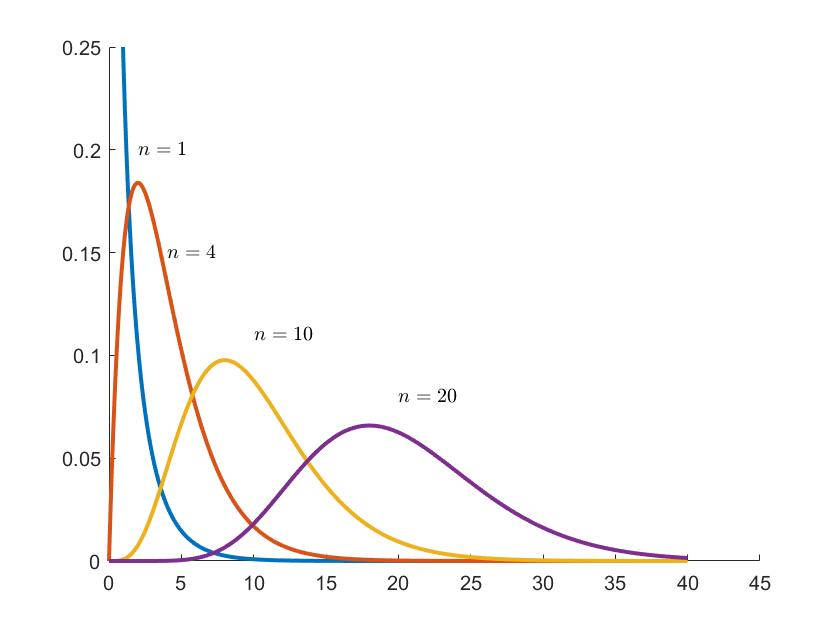

In [88]:
im5 = Image("figs/chi2.jpg",width=500)
display(im5)

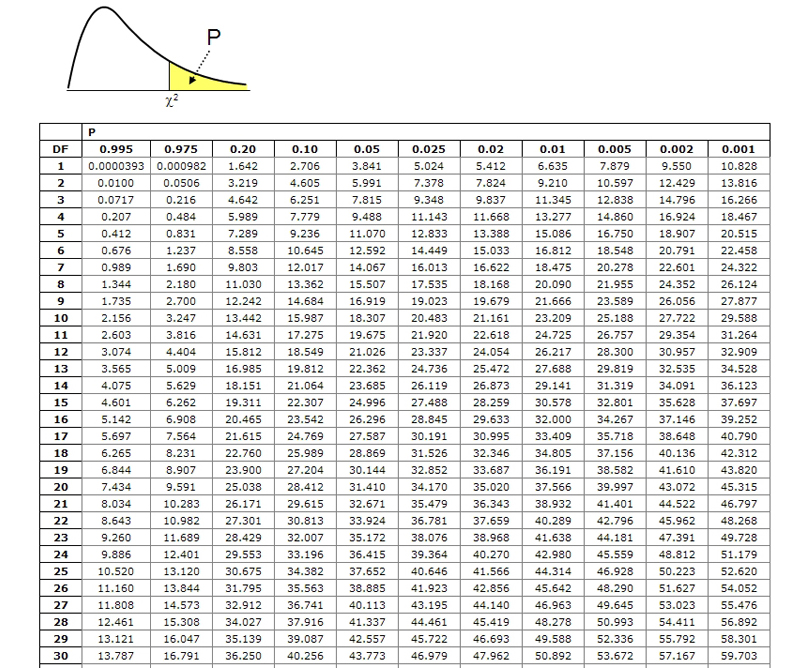

In [89]:
# 卡方分配表
im6 = Image("figs/chi2Table.jpg",width=800)
display(im6)

$\chi^2$ 越大，Pvalue越小，即H0不能成立，**有差异**, 例：自由度=1， $\chi^2 > 3.841$, pvalue < 0.05, 拒绝H0

## 行*列 表的卡方检验
### scipy
```Python
scipy.chisquare(f_obs[,f_exp,ddof,axis])     #  单样本卡方检验
scipy.chi2_contingency(observed[,correction,lambda_])     #  列联表卡方检验

scipy.contingency.expected_freq(observed) #  列联表的期望频数
scipy.contingency.margins(a)              #  列联表的边际汇总
scipy.fisher_exact(table[,alternative])   #  2*2 表格计算fisher确切概率检验结果

scipy.stats.chi2_contingency(
                observed             # 观察到的列联表，类二维数组结构
                correction = True    # 是否计算Yates校正的卡方结果
                lambda_ = None       # 换用Cressie-Read power divergence family 统计量
                )                    # 输出： 卡方值，P值，自由度，期望频数
```

In [90]:
tb1 = pd.crosstab(ccss.Ts9,ccss.O1)
tb1

O1,有,没有
Ts9,,
"Below 48,000",32,303
"Over 48,000",225,429


In [91]:
# 看一下期望频数
ss.contingency.expected_freq(tb1)

array([[ 87.05257836, 247.94742164],
       [169.94742164, 484.05257836]])

In [92]:
# 看行列汇总
ss.contingency.margins(tb1)

[array([[335],
        [654]]), array([[257, 732]])]

In [93]:
ss.chi2_contingency(tb1,False)

(71.13403472094657,
 3.3376260954267e-17,
 1,
 array([[ 87.05257836, 247.94742164],
        [169.94742164, 484.05257836]]))

chi2 = 71,
Pvalue = 3.3e-17, 拒绝H0，接受H1: 两者是不一样的

degree of freedom = 1,
期望频数（expected frequency）

In [94]:
(32-87)**2/87+(303-247.9)**2/247.9+(225-169.9)**2/169.9+(429-484)**2/484

71.13642278182199

### statsmodels
```Python
class statsmodels.stats.contingency_table.Table(table,shift_zeros=True) # 如果单元格频数为0，所有单元格频数+0.5防止计算出错
```
- Table 类的属性

```Python
table_orig                       # 表格原始数据 
marginal_probabilities           # 估计的行列边际概率分布
independec_probabilities         # 基于行列独立的H0假设的单元格概率分布
fittedvalues                     # 期望频数

resid_pearson                    # Pearson残差
standardized_resid               # 标准化残差
chi2_contribs                    # 每个单元格的卡方贡献值
``` 
- Table 类的方法

```Python
test_nominal_association()      # 无序分类行、列变量的独立性检验, 输出(卡方统计量，自由度，P值)
test_ordinal_association([row_scores,...])      # 有序分类行/列变量的独立性检验，Cochran_Armitage趋势检验
```

In [95]:
table = tbl.Table(pd.crosstab(ccss.Ts9,ccss.O1))
table

In [96]:
print(table.table_orig)
print(table.fittedvalues)
print(table.resid_pearson)
print(table.chi2_contribs)

O1              有   没有
Ts9                   
Below 48,000   32  303
Over 48,000   225  429
O1                     有          没有
Ts9                                 
Below 48,000   87.052578  247.947422
Over 48,000   169.947422  484.052578
O1                   有        没有
Ts9                             
Below 48,000 -5.900473  3.496213
Over 48,000   4.222993 -2.502254
O1                    有         没有
Ts9                               
Below 48,000  34.815584  12.223504
Over 48,000   17.833671   6.261275


In [97]:
table.marginal_probabilities

(Ts9
 Below 48,000    0.338726
 Over 48,000     0.661274
 dtype: float64, O1
 有     0.259858
 没有    0.740142
 dtype: float64)

In [98]:
res = table.test_nominal_association()
print(res.statistic,res.df,res.pvalue)

71.13403472094657 1 0.0


## 卡方检验的两两比较
- 仍然需要进行检验水准校正下的两两比较
- 复杂建模方法，进行哑变量的精细比较（适合研究，实际少用）
- 图示分析方法
Table类中的两两拆分或者依次切分功能可以作为初步观察工具
```Python
local_logodds_ratios             # 拆分成多个相邻2*2表格后计算的lnOR值
local_oddsratios                 # 拆分成多个相邻2*2表格后计算的OR值
cumulative_log_oddsratios        # 依次切分成2*2表格后计算的lnOR值
cumulative_oddsratios            # 依次切分成2*2表格后计算的OR值
```

In [99]:
table2 = tbl.Table(pd.crosstab(ccss.s0,ccss.O1))
table2.table_orig

O1,有,没有
s0,,
上海,87,300
北京,118,258
广州,107,274


In [100]:
res = table2.test_nominal_association()
print(res.statistic,res.df,res.pvalue)

7.80961277431242 2 0.02014485441628988


Pvalue=0.02 < 0.05, 拒绝H0(没差异)，H1(有差异)

In [101]:
table2.local_oddsratios

O1,有,没有
s0,,
上海,0.634068,NaN
北京,1.171195,NaN
广州,NaN,NaN


表格给出OR值，OR=1，两者无关联

In [102]:
table2.cumulative_oddsratios

O1,有,没有
s0,,
上海,0.685689,NaN
北京,0.940776,NaN
广州,NaN,NaN


##  卡方校正与确切概率法
- 卡方分布是连续分布，但实际计算的卡方应当是不连续的
    - 当样本量较小时，两者间的差异不可忽略，应进行连续性校正
    - Yates提出的方法是在每个单元格的残差中减去0.5
        - 若n>40, 且1<T<5时，需计算Yates连续性校正卡方值
        - 若T<1 或 n<40 时，应改用Fisher**确切概率法**直接计算概率
- 卡方检验可能有问题时，直接使用确切概率法
- 计算量太大，无法得到确切概率时，使用**模特卡洛抽样计算概率区间**
- For 2*2 Table
```Python
scipy.stats.fisher_eaxct(table, alternative = 'two-sided'/'less'/'greater') # output(OR value, probabilities) 
```

In [103]:
tb1 = pd.crosstab(ccss.Ts9,ccss.O1)
ss.chi2_contingency(tb1)       # 默认直接进行Yates校正

(69.84779147655631,
 6.40617860930384e-17,
 1,
 array([[ 87.05257836, 247.94742164],
        [169.94742164, 484.05257836]]))

In [104]:
# 确切概率结果
ss.fisher_exact(tb1)

(0.20136413641364137, 6.020767659946375e-19)

OR值和Pvalue，校正的卡发检验给出的Pvalue与确切概率法给出的确切概率值相差2个数量级

```Python
ss.fisher_exact(pd.crosstab(ccss.s0,ccss.O1))    # 超过2*2 表格时会报错
```

## 配对卡方检验
- 基本思路： 求出各对的差值，然后考察样本中差值的分布是否按照H0假设的情况对称分布
    - 主对角线上的样本表示两种检验方法的结论相同
    - **非对角线上的单元格才携带检验方法的差异信息**
        - H0: 两法无差别（B等于C）
        - H1: 两法有差别（B不等于C）
    - 根据H0得到b、c两个的理论数均为Tb=Tc=(b+c)/2,对应的配对检验统计量则为$\chi^2=\frac{(b-c)^2}{b+c}, \nu=1$
        - b+c < 40,需要确切概率法进行检验，或者进行校正

```Python
tbl.mcnemar           # 用于分析配对四格表（确切概率结果),  
# mcnemar class method
.pvalue

tbl.cochrans_q        # 将配对四格表检验从两组向多组扩展的方法，两组时等价于mcnemar
```
```Python
tbl.SquareTable       # 用于分析行列变量类别相同的对称结构方表，方阵结构
# SquareTable class method
summary([alpha,float_format])     # 输出下面两个检验的汇总结果
symmetry([method])                # 检验表格是否沿对角线对称
homogeneity([method])             # 检验行列变量的边际分布是否相同
```

In [105]:
table = tbl.mcnemar(pd.DataFrame([[56,35],[21,28]]))

In [106]:
table.pvalue

0.08142681460950622

In [107]:
import numpy as np
table3 = tbl.SquareTable(np.asarray([[56,35],[21,28]]))
table3.summary()

,Statistic,P-value,DF
Symmetry,3.500,0.061,1
Homogeneity,3.500,0.061,1


## 分层卡方检验
- 卡方检验只能研究行、列两变量间的关联
- 如何在控制第三个分类变量影响的前提下，提供更精确的分析结果？
- 层间关联强度的齐性检验
    - H0:各层间行、列变量的关联强度完全一致
- 控制分层因素影响之后的行列关联强度估计与检验
    - Mantel-Haenszel卡方检验
    - H0:在控制了分层变量的影响之后，行、列变量的关联强度为0（或为指定大小的数值）
    - 前提条件：各层关联强度相同，可以进行合并估计
- 无法合并估计时，考虑分层分析，或者使用logistic回归等方法建模，并加入交互项
- StratifiedTable 类
```Python
class statsmodels.stats.contingency.StratifiedTable(table,shift_zeros=False)  # table：2*2*k结构的ndarray
```
- StratifiedTable类的属性
```Python
logodds_pooled/log_oddsratio_se     # 分层lnOR的M-H估计值
oddsratio_pooled                    # 分层OR的M-H估计值
risk_pooled                         # 分层RR估计值
```
- StratifiedTable类的方法
```Python
summary([alpha,float_format,method])     # 分层卡方结果的汇总输出
```

In [108]:
# 分层表
rawtb1 = pd.crosstab([ccss.s0,ccss.Ts9],ccss.O1)
rawtb1

O1                有   没有
s0 Ts9                  
上海 Below 48,000   4  103
   Over 48,000   70  160
北京 Below 48,000   9   93
   Over 48,000   83  134
广州 Below 48,000  19  107
   Over 48,000   72  135

In [109]:
pd.crosstab([ccss.s0,ccss.Ts9],ccss.O1,normalize=0)

O1                      有        没有
s0 Ts9                             
上海 Below 48,000  0.037383  0.962617
   Over 48,000   0.304348  0.695652
北京 Below 48,000  0.088235  0.911765
   Over 48,000   0.382488  0.617512
广州 Below 48,000  0.150794  0.849206
   Over 48,000   0.347826  0.652174

In [110]:
table4 = tbl.StratifiedTable([rawtb1[:2],
                             rawtb1[2:4],
                             rawtb1[4:]])
table4

In [111]:
table4.summary()

,Estimate,LCB,UCB
Pooled odds,0.195,0.130,0.292
Pooled log odds,-1.636,-2.040,-1.232
Pooled risk ratio,0.272,,
,,,
,Statistic,P-value,
Test of OR=1,72.178,0.000,
Test constant OR,6.165,0.046,
,,,
Number of tables,3,,
Min n,319,,


P=0.046 < 0.05, 层与层之间是有差异的，不可进行合并，要分层进行检验

# <font color='blue'>二项分布及检验

## Bernouli试验序列
- 在重复实验中，如果对每一次实验，出现的结果只有两种情况，即Bernouli试验
- 每次试验的条件不变，即每次试验中，如果A发生的概率不变（假设为$\pi$）
- 各次试验独立，即一次试验出现什么样的结果与前面已出现的结果无关
- 满足以上三个条件的n次Bernouli试验构成的序列称为Bernouli试验序列

## 二项分布
- 对于Bernouli试验序列的n次试验，结局A**出现的次数X的概率**分布服从二项分布
<font color='red'>$\displaystyle P(X=k) = C^n_k \pi^k(1-\pi)^{n-k}$</font>
    - 二项分布值的是概率的分布
    - 二项分布是一个离散分布
    - test times: n 
    - success times: k
- 二项分布的两个参数：n，$\pi$
- 若X服从二项分布，则记为 $X \sim B(n,\pi)$
    - 均数：$\mu=n\pi$
    - 方差：$\sigma^2=n\pi(1-\pi)$
- 二项分布的基本特征：
<font color='red'>$\displaystyle Pr(x)=\frac{n!}{x!(n-x)!} \pi^x (1-\pi)^{n-x}$</font>
    - $\pi=0.5$, 图形对称
    - $\pi\ne0.5$, 图形呈偏态，但随n的增大，图形逐渐对称
    - 因此，当n较大，$\pi$不太极端时，可以采用正态近似的方法计算概率分布规律（例如计算参考值范围）
- 样本率的抽样分布
    - 对于大量重复随机抽样而言，样本率p围绕着总体率$\pi$波动，样本率n的值越大，这种波动就缺小。
    - 当n的值充分大时，p的分布就近似于$\mu$为$\pi$，$\sigma^2=n\pi(1-\pi)$的正态分布，按正态近似法求总体率的$1-\alpha$可信区间
        - 一般的标准是$n\pi$和$n(1-\pi)$均大于5，且$n>40$
        - 当样本情况接近此标准时，往往会进行校正
    - 当样本例数较小，且样本率接近1或0，即阳性事件发生率很高或很低时，应当按照率的抽样分布规律确定总体率的可信区间
- 率的比较
    - 当n较大，$n\pi$和$n(1-\pi)$均不太小时，样本率的抽样分布近似正态分布，可以使用正态分布的原理做假设检验（z-test）
    - 反之，则可使用二项分布自身的概率分布进行假设检验，这种方法称为二项分布检验（确切概率法）

## 二项分布检验与近似Z检验
### 率的可信区间
- 二项分布指标的率的可信区间的上下限
```Python
statsmodels.stats.proportion.proportion_confint(     # 二项分布指标的率的可信区间的上下限
                count                                # 成功次数
                nobs                                 # 样本总数
                alpha = 0.5                          
                method = 'normal'                    # 可信区间的计算方法，正态近似法
                        'agresti_coull'              # Agresti-Coull interval
                        'beta'                       # clopper-pearson interval based on Beta distribution
                        'wilson'                     # wilson score interval
                        'jeffreys'                   # Jeffreys Bayesian interval
                        'binom_test')                # experimental, inversion of binom_test
```
- 多项分布指标的率的可信区间的上下限
```Python
statsmodels.stats.proportion.multinomial_proportions_confint(     # 二项分布指标的率的可信区间的上下限
                count                                # 每个类别的观察频数，类一维数组结构
                nobs                                 # 样本总数
                alpha = 0.5                          
                method = 'goodman'                   # 可信区间的计算方法，基于卡方近似，适用条件同卡方检验
                        'sison-glaz')                 # 更准确一些，但只针对有7ge及其以上类别时才有效
```

In [112]:
# 成功5次，总共10，这种情况下的可信区间。使用正态分布法
sprop.proportion_confint(5,10)         

(0.19010248384771916, 0.8098975161522808)

In [113]:
sprop.proportion_confint(5,10,method='binom_test') 

(0.2224411010081248, 0.7775588989918751)

In [114]:
sprop.multinomial_proportions_confint([5,5]) 

array([[0.21086627, 0.78913373],
       [0.21086627, 0.78913373]])

### 二项分布检验
- 基于二项分布的确切检验
```Python
statsmodels.stats.proportion.binom_test(    # output: pvalue
            count,
            nobs,
            prop = 0.5,
            alternative = 'two-sided')
```
- 基于卡方的多项分布检验,**检验各个类别出现的概率是否相同**
```Python
statsmodels.stats.proportion.proportions_chisquare(     # output(chi2_value,pvalue,(table,expected value))
            count,           #按列表形式给出各类别频数
            nobs,
            value = None)
```

In [115]:
# roll dice for 600 times，only 1 time win
sprop.binom_test(1,600)      

2.896723677853689e-178

In [116]:
# 三个类别出现次数分别为5次，3次，2次，总共是10次
sprop.proportions_chisquare([5,3,2],10)        

(2.1, 0.3499377491111554, (array([[5, 5],
         [3, 7],
         [2, 8]]), array([[3.33333333, 6.66666667],
         [3.33333333, 6.66666667],
         [3.33333333, 6.66666667]])))

chi2=2.1,pvalue=0.35,array[True times,False times],array[True propability,False probability]

# <font color='blue'>Norm dis. to Standard Norm dis. 

<font color='red'>$\displaystyle z=\frac{x-\mu}{\sigma}$</font>

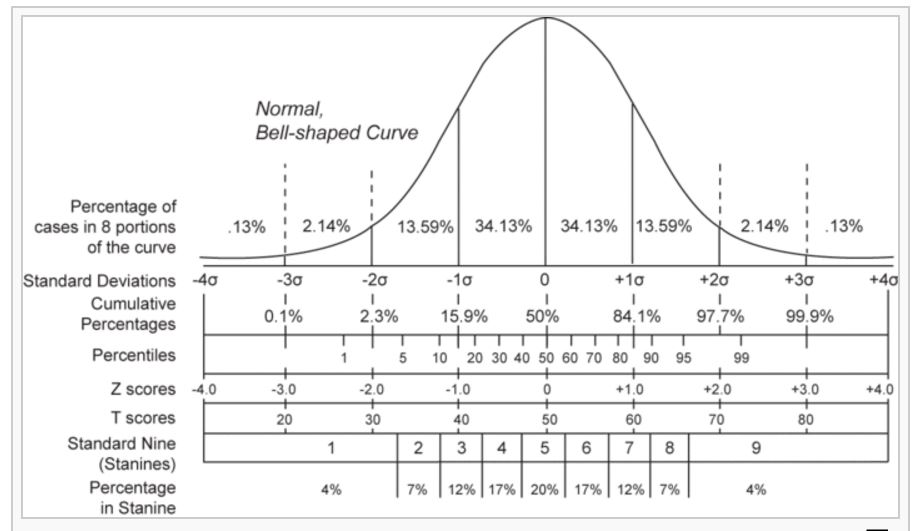

In [117]:
im2 = Image("figs/zscore.jpg",width=800)
display(im2)

### 近似Z检验
```Python
statsmodels.stats.proportion.proportions_ztest(    # output( Z-statisticd, pvalue)
            count,                                 # 成功次数，单一数值/类数组结构列表
            nobs,                                  # 总样本量，单一数值/类数组结构列表
            value = None,                          # H0对应的总体率/率差
            alternative = 'two-sided'
            prop_var = False                       # 指定方差分配比例，默认按照样本比例进行计算
            )
```

In [118]:
# 100次试验中成功30次，总体率的概率是20%，检验是否偏离20%的假定
sprop.proportions_ztest(30,100,0.2)                  

(2.182178902359923, 0.029096331741252257)

In [119]:
# A组是100次成功30次，B组是200次成功65次，两组偏差是否为0
sprop.proportions_ztest([30,65],[100,200],0)        

(-0.4388103885786194, 0.6607989322347501)

# 相关分析的实现
## 变量的关联性分析 (相关分析)
- 用于考察变量间数量关联密切程度的统计分析方法
- 几乎所有涉及到多个变量的假设检验方法，都可以被看成是这些变量间的关联性分析
    - t检验：分组变量与连续因变量间的关联性分析
    - 卡方检验：行、列分类变量间的关联性分析
    - 聚类分析：案例间的关联性分析
    - 多变量回归：因变量和一组自变量间的关联性分析
- 各种相关系数
    - 连续 vs 连续 (用散点图确认关联趋势是否为曲线)
        - Pearson 相关系数
        - Spearman 秩相关系数
    - 有序 vs 有序 (用条形图、柱状图等)
        - Gamma 系数
    - 无序 vs 无序
        - 列联系数
            - 基于卡方统计量进一步推到而来
            - 无方向，0～1
        - OR/RR：一类特殊的关联强度指标
    - 连续 vs 分类：
        - Eta
        - 实质为方差解释度
        
## 相关系数的计算原理
- 两连续变量的相关：Pearson相关系数
    - 在双变量正态分布的前提假设下，基于方差和协方差等指标提出的
    - 方差：每个变量的离散程度（信息量大大小）
    - 协方差：各变量共同携带的信息量大小
    - 决定系数：协方差/sqrt(方差X*方差Y)，两个变量总信息量中的工体部分的占比. 
        - <font color='red'>$cov = r\sigma_x\sigma_y$</font>
        - -1< r <1, r是相关系数
- Pearson相关系数的检验
    - H0: 两变量间<font color='red'>**无直线相关关系**</font>，$\rho=0$
    - H1: 两变量间**有直线相关关系**
    - 检验方法t-test：
<font color='red'>$\displaystyle t=\frac{r-0}{S_r}, \nu=n-2, S_r=\sqrt{\frac{1-r^2}{n-2}}$</font>
    - 适用条件：
        - 必须是线性相关的情形
        - 极端值对相关系数的计算影响极大
        - 要求相应的变量呈双变量正态分布
- Pearson秩相关系数
    - 当相关分析的两变量X、Y并不符合适用条件时，r就不能正确地反应X、Y间的相关性
    - Spearman提出，首先对数据做秩变换，然后再计算两组秩之间的线性相关系数，$r_s$

## 相关分析的实现
- <font color='red'>两个连续变量，且符合双变量正态分布：Pearson相关系数</font>
```Python
scipy.stats.pearsonr(a,b)
```
- <font color='red'>两个连续变量，不符合双变量正态分布：SPearman等级相关系数</font>
```Python
scipy.stats.spearmanr(a,b)
```
- <font color='red'>两个分类变量 vs 连续变量：Point-biserial相关系数</font>
```Python
scipy.stats.pointbiserialr(a,b)
```
- <font color='red'>两个有序变量：Kendall's Tau</font>
```Python
scipy.stats.kendalltau(a,b,initial_lexsort=None,nan_police='omit')
```

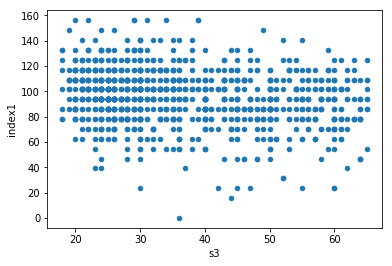

In [120]:
ccss.plot.scatter('s3','index1');

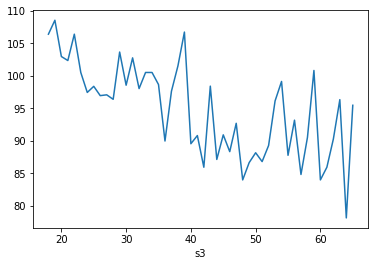

In [121]:
ccss.groupby('s3').index1.mean().plot();

In [122]:
ss.pearsonr(ccss.s3,ccss.index1)   # r=-0.21, p=6.24e-14,两者是相关的

(-0.21907931508110484, 6.243011312736348e-14)

In [123]:
ss.spearmanr(ccss.s3,ccss.index1)     # 结论差不多

SpearmanrResult(correlation=-0.2125350543722125, pvalue=3.5052125212401515e-13)

In [124]:
# 分类变量的相关性
pd.crosstab(ccss.Qa3,ccss.Qa4)

Qa4,0,50,100,150,200
Qa3,,,,,
0,17,5,37,9,1
50,3,12,60,13,6
100,11,24,298,121,49
150,2,3,128,150,55
200,0,3,35,45,60


In [125]:
ss.kendalltau(ccss.Qa3,ccss.Qa4)

KendalltauResult(correlation=0.36160288401193186, pvalue=1.2174998300952934e-45)

In [126]:
ss.spearmanr(ccss.Qa3,ccss.Qa4)

SpearmanrResult(correlation=0.4077520461065906, pvalue=3.545617702191146e-47)

## 相对危险度Relative Risk & 优势比Odds Ratio
- RR：表示两种情况下发病密度或者说发病概率比
$\displaystyle RR=\frac{P_t}{P_c}$
    - Pt：实验组人群反应阳性概率
    - Pc：对照组人群反应阳性概率
    - RR > 1： 相应的自变量取值增加，会导致个体的发病/死亡风险增加若干倍
- OR：反应阳性人群中实验因素有无的比例a/b 与 反应阴性人群中实验因素有无的比例c/d 之比
$\displaystyle OR=\frac{a/b}{c/d}$
    - OR可以间接反应关联强度
    - 用于回顾性研究

### OR/RR 实现
- scipy
```Python
scipy.stats.fisher_exact()       # 检验P值是确切概率法的P值
```
- statsmodel
    - Table 类
```Python
statsmodels.stats.contingency_tables.Table       # 提供2*2表的OR估计值
statsmodels.stats.contingency_tables.Table2x2(table,shift_zeros=True)# 提供2*2表的OR、RR估计和检验结果   
```
    - 类的属性
```Python
    log_oddsratio / log_oddsratio_se
    oddsratio
    riskratio
    log_giskratio / log_riskratio_se
    summary()
```

In [127]:
OR, P = ss.fisher_exact(pd.crosstab(ccss.Ts9,ccss.O1))
OR

0.20136413641364137

In [128]:
table5 = tbl.Table2x2(np.asarray(pd.crosstab(ccss.Ts9,ccss.O1)))
table5

In [129]:
table5.summary()

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.201,,0.135,0.300,0.000
Log odds ratio,-1.603,0.203,-2.001,-1.204,0.000
Risk ratio,0.278,,0.196,0.392,0.000
Log risk ratio,-1.281,0.177,-1.627,-0.935,0.000


# 样本量估计
## 样本量估计的基本原理
- 直接从假设检验的I、II类错误问题发展而来
- 原假设成立时，如果超过某个C点，则原假设被拒绝，I类错误
- 在备择假设成立的情况下，如果低于某个C点，则原假设不能被拒绝，备择假设不能被接受，II类错误
- 两个公式中的C点应当相同，联立求解，得到相应的N

## 单组/两组均值比较的样本量计算
- 单样本/配对样本 
$\displaystyle N=[\frac{(\mu_\alpha+\mu_\beta)\sigma_d}{\delta}]^2$,$\displaystyle \mu_\beta = \delta\frac{\sqrt{N}}{\sigma_d}-\mu_\alpha$
- 成组两样本
$\displaystyle N=[\frac{2(\mu_\alpha+\mu_\beta)\sigma}{\delta}]^2$,$\displaystyle \mu_\beta = \delta\frac{\sqrt{N}}{2\sigma}-\mu_\alpha$
- 公式中的$\delta/\sigma$ 也被称为effect size，即希望能够检验出的相对差异
- 实际使用中需要加上10%～20%的例数，以补充可能的损失

### 单样本/配对样本t-test
- TTestPower 类
```Python
class statsmodels.stats.powers.TTestPower()
```
- TTestPower 类的方法
```Python
plot_power([dep_var,nobs,effect_size,..])          # 绘制两本量与检验效能的曲线图
power(                          # 计算相应检验效能，输出：检验效能值
    effect_size                 # 标准化（差值/标准差）之后希望检出的差距，必须为正值
    nobs                        # 设定的样本量
    alpha                       # alpha水准
    df = None                   # 自由度
    alternative = 'two-sided'/'larger'/'smaller')
```
```Python
solve_power(                    # 基于检验效能反推任何一个参数，输出：缺失的相应参数
    effect_size                 # 标准化（差值/标准差）之后希望检出的差距，必须为正值
    nobs                        # 设定的样本量
    alpha                       # alpha水准
    power = None                   
    alternative = 'two-sided'/'larger'/'smaller')
```
- 研究新药降低高血脂患者的胆固醇的效果，研究者规定试验组的血清胆固醇平均降低0.5mmol/L以上，才有进一步研究的价值。引用文献中胆固醇的标准差为0.8mmol/L，规定单侧$\alpha=0.05$,power=0.90,要求估计样本量。

In [130]:
sp1 = spower.TTestPower()

In [131]:
# 计算样本量，需要23.34例样本
sp1.solve_power(effect_size=0.5/0.8,nobs=None,alpha=0.05,
               power=0.9,alternative='larger')

23.34488303343584

In [132]:
# 计算检验效能,power=0.9
sp1.power(effect_size=0.5/0.8,nobs=24,alpha=0.05,alternative='larger')

0.9074198379719143

### 两样本t-test
- TTestIndPower 类
```Python
class statsmodels.stats.powers.TTestIndPower()
```
- TTestIndPower 类的方法
```Python
plot_power([dep_var,nobs,effect_size,..])          # 绘制两本量与检验效能的曲线图
power(                          # 计算相应检验效能，输出：检验效能值
    effect_size                 # 标准化（差值/标准差）之后希望检出的差距，必须为正值
    nobs1                       # 组1的样本量
    alpha                       # alpha水准
    ratio =1                    # 两组样本量之比，组2=组1*ratio  
    df = None                   # 自由度
    alternative = 'two-sided'/'larger'/'smaller')
```
```Python
solve_power(                    # 基于检验效能反推任何一个参数，输出：缺失的相应参数
    effect_size                 # 标准化（差值/标准差）之后希望检出的差距，必须为正值
    nobs1                       # 组1的样本量
    alpha                       # alpha水准
    power = None                   
    ratio = 1
    alternative = 'two-sided'/'larger'/'smaller')
```
- 研究新药降低高血脂患者的胆固醇的效果，研究者规定试验组与对照组相比的，血清胆固醇平均降低0.5mmol/L以上，才有进一步研究的价值。引用文献中胆固醇的标准差为0.8mmol/L，规定单侧$\alpha=0.05$,power=0.90,要求估计样本量。

In [133]:
sp2 = spower.TTestIndPower()
# 计算样本量，需要组1=组2=44.5例样本
sp2.solve_power(effect_size=0.5/0.8,nobs1=None,alpha=0.05,
               power=0.9, ratio = 1.0, alternative='larger')

44.53997146070881

In [134]:
# 计算样本量，组1=33.3，组2=33.3*2
sp2.solve_power(effect_size=0.5/0.8,nobs1=None,alpha=0.05,
               power=0.9, ratio = 2.0, alternative='larger')

33.34598279030115

In [135]:
# 计算可检验的效应大小 = 0.63
sp2.solve_power(effect_size=None, nobs1= 44,alpha=0.05,
               power=0.9, ratio = 1.0, alternative='larger')

0.6288840135160791

## 多组均值比较的样本量计算
- 实用：根据最重要的两样本组数据的特征进行样本总量外推
- 严格：基于组间变异进行计算
    - 难点在于计算effect size
    
$\displaystyle f=\sqrt{\frac{\sum^k_{i=1}p_i(\mu_i-\mu)^2}{\sigma^2}}$
where $p_i=n_i/N$,$n_i$ is the number of observations in group i,
N is total number of observations,
$\mu_i$ is the mean of group i,
$\mu$ is grand mean,
$\sigma^2$ is error variance within groups.
    - Cohen建议将 f=0.1，0.25，0.4分别作为小、中、大的效应值进行估计

### 单因素方差分析
- FTestAnovaPower 类
```Python
class statsmodels.stats.powers.FTestAnovaPower()
```
- FTestAnovaPower 类的方法
```Python
plot_power([dep_var,nobs,effect_size,..])          # 绘制两本量与检验效能的曲线图
power(                          # 计算相应检验效能，输出：检验效能值
    effect_size                 # 各组加权综合计算出的效应值 f，必须为正值
    nobs                       
    alpha                       # alpha水准
    k_groups = 2）               # 用于比较的样本组数  
```
```Python
solve_power(                    # 基于检验效能反推任何一个参数，输出：缺失的相应参数
    effect_size                 # 各组加权综合计算出的效应值 f，必须为正值
    nobs                       
    alpha                       # alpha水准
    power = None                   
    k_groups = 2）               # 用于比较的样本组数  
```

In [136]:
sp3 = spower.FTestAnovaPower()
sp3.solve_power(effect_size=0.1,nobs=None,alpha=0.05,
               power=0.9, k_groups = 3)

1268.3933013043206

In [137]:
sp3 = spower.FTestAnovaPower()
sp3.solve_power(effect_size=0.25,nobs=None,alpha=0.05,
               power=0.9, k_groups = 3)

205.49086168426783

In [138]:
sp3 = spower.FTestAnovaPower()
sp3.solve_power(effect_size=0.4,nobs=None,alpha=0.05,
               power=0.9, k_groups = 3)

82.16474744262409

## 率的比较多样本量计算
- 分类变量不需要另行估计变异，因为可以从‘均数’计算得出
- 计算原理上和均数比较完全相同，但是难点在于如何给出effect size的合理估计值
    - 方法1: <font color='red'>effect size = 2*(arcsin(sqrt(p1))-arcsin(sqrt(p2)))</font>
        - Cohen建议将 **h=0.2，0.5，0.8**分别作为小、中、大的效应值用于估计
    - 方法2:正态近似估计
    $\displaystyle N=\frac{(\mu_\alpha+\mu_\beta)^2 4\pi_c(1-\pi_c)}{(\pi_1-\pi_2)^2}$
    $\displaystyle \mu_\beta = \frac{\sqrt{N}|\pi_1-\pi_2|}{2\sqrt{\pi_c(1-\bar{\pi})}}-\mu_\alpha$

### 单样本/配对率的比较
- 常规条件下，某动物模型出现阳性结局的概率为0.4，某研究人员考虑采用另一种方法进行试验，使用60个动物进行该研究，预期的成功率为0.5，请估计该检验的效能是否充足

In [139]:
p1 = 0.5; p2 = 0.4
h = 2*(np.arcsin(np.sqrt(p1))-np.arcsin(np.sqrt(p2)))
h

0.20135792079033088

In [140]:
# 使用单眼本t检验框架进行计算
sp1.solve_power(effect_size = h, nobs = 60, alpha = 0.05, power = None)

0.3354309335796794

### 两样本率的比较
- 某动物模型出现阳性结局的概率为0.15，现考虑采用改进的新方法进行比较，预期新方法阳性概率为0.3，请估计该实验所需的动物样本量

In [141]:
p1 = 0.3; p2 = 0.15
h = 2*(np.arcsin(np.sqrt(p1))-np.arcsin(np.sqrt(p2)))
h

0.3638806505432649

In [142]:
# 使用两样本t检验框架
sp2.solve_power(effect_size = h, nobs1 = None, alpha = 0.05, power = 0.8, 
                alternative = 'larger')

94.06942058074941